#We'll use data science to predict steel fatigue strength based on its composition and processing, helping engineers build stronger, longer-lasting structures.








#What is Fatigue strength and why it is important?

###Think of fatigue strength as the endurance of a material like steel when it's repeatedly stressed. Imagine bending a paperclip back and forth until it breaks. Steel works a bit like that too, but on a much larger scale.
###When we use steel in things like buildings, bridges, or even in tools and machines, it's constantly dealing with forces—like being pushed, pulled, or twisted. Fatigue strength tells us how much of this back-and-forth stress it can handle before it gives out.
###For someone without mechanical knowledge, it's like knowing how many times you can bend a piece of wire before it snaps. Engineers use this information to make sure that the stuff we build lasts a long time and stays safe to use, even with all the pushing and pulling it goes through in its lifetime.

#Role of chemical composition and Heat treatment methods In steel manufacturing.

###Imagine you're baking a cake. The ingredients you choose and how you bake it can determine how moist and delicious it turns out. Similarly, the "recipe" for making steel involves selecting the right elements and applying heat treatments, which are like baking methods, to get the desired properties.
###So, just like a chef adjusts ingredients and cooking techniques to make the perfect cake, engineers tweak the chemical composition and heat treatment of steel to get the right balance of strength and durability. This ensures that the steel can handle the ups and downs of stress without crumbling, just like a well-baked cake holds together beautifully when sliced.

#About the Dataset

#####This dataset contains 25 experimental features, including:

#####Chemical composition - %C, %Si, %Mn, %P, %S, %Ni, %Cr, %Cu, %Mo (all in wt. %)
#####Upstream processing details - ingot size, reduction ratio, non-metallic inclusions
#####Heat treatment conditions - temperature, time and other process conditions for normalizing, through-hardening, carburizing-quenching and tempering processes
#####For mechanical properties, we'll consider Yield Strength (YS), Ultimate Tensile Strength (UTS), Percentage of Elongation (%EL), Percentage of Reduction in Area (%RA), hardness, Charpy impact value (J/cm2), and fatigue strength.

######C	% Carbon
######Si	% Silicon
######Mn	% Manganese
######P	% Phosphorus
######S	% Sulphur
######Ni	% Nickel
######Cr	% Chromium
######Cu	% Copper
######Mo	% Molybdenum
######NT	Normalizing Temperature
######THT	Through Hardening Temperature
######THt	Through Hardening Time
######THQCr	Cooling Rate for Through Hardening
######CT	Carburization Temperature
######Ct	Carburization Time
######DT	Diffusion Temperature
######Dt	Diffusion time
######QmT	Quenching Media Temperature (for Carburization)
######TT	Tempering Temperature
######Tt	Tempering Time
######TCr	Cooling Rate for Tempering
######RedRatio	Reduction Ratio (Ingot to Bar)
######dA	Area Proportion of Inclusions Deformed by Plastic Work
######dB	Area Proportion of Inclusions Occurring in Discontinuous Array
######dC	Area Proportion of Isolated Inclusions
######Fatigue	Rotating Bending Fatigue Strength (10^7 Cycles)



#Importing the referances and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelBinarizer,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA,MiniBatchSparsePCA
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor


#Importing the dataset.

In [2]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [3]:
df=pd.read_csv("data.csv")

#Exploratory Data Analysis & Data Cleaning.

In [4]:
df.head()

Sl. No.   NT  THT  THt  THQCr  CT   Ct    DT   Dt  QmT  ...      S    Ni  \
0        1  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.022  0.01   
1        2  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.017  0.08   
2        3  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.015  0.02   
3        4  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.024  0.01   
4        5  885   30    0      0  30  0.0  30.0  0.0   30  ...  0.022  0.01   

     Cr    Cu   Mo  RedRatio    dA    dB    dC  Fatigue  
0  0.02  0.01  0.0       825  0.07  0.02  0.04      232  
1  0.12  0.08  0.0       610  0.11  0.00  0.04      235  
2  0.03  0.01  0.0      1270  0.07  0.02  0.00      235  
3  0.02  0.01  0.0      1740  0.06  0.00  0.00      241  
4  0.02  0.02  0.0       825  0.04  0.02  0.00      225  

[5 rows x 27 columns]

In [5]:
#Dropping out the SL.No column as of no use.
df=df.drop('Sl. No.',axis=1)

In [6]:
#Getting the shape of DataSet.
df.shape

(437, 26)

In [7]:
#Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

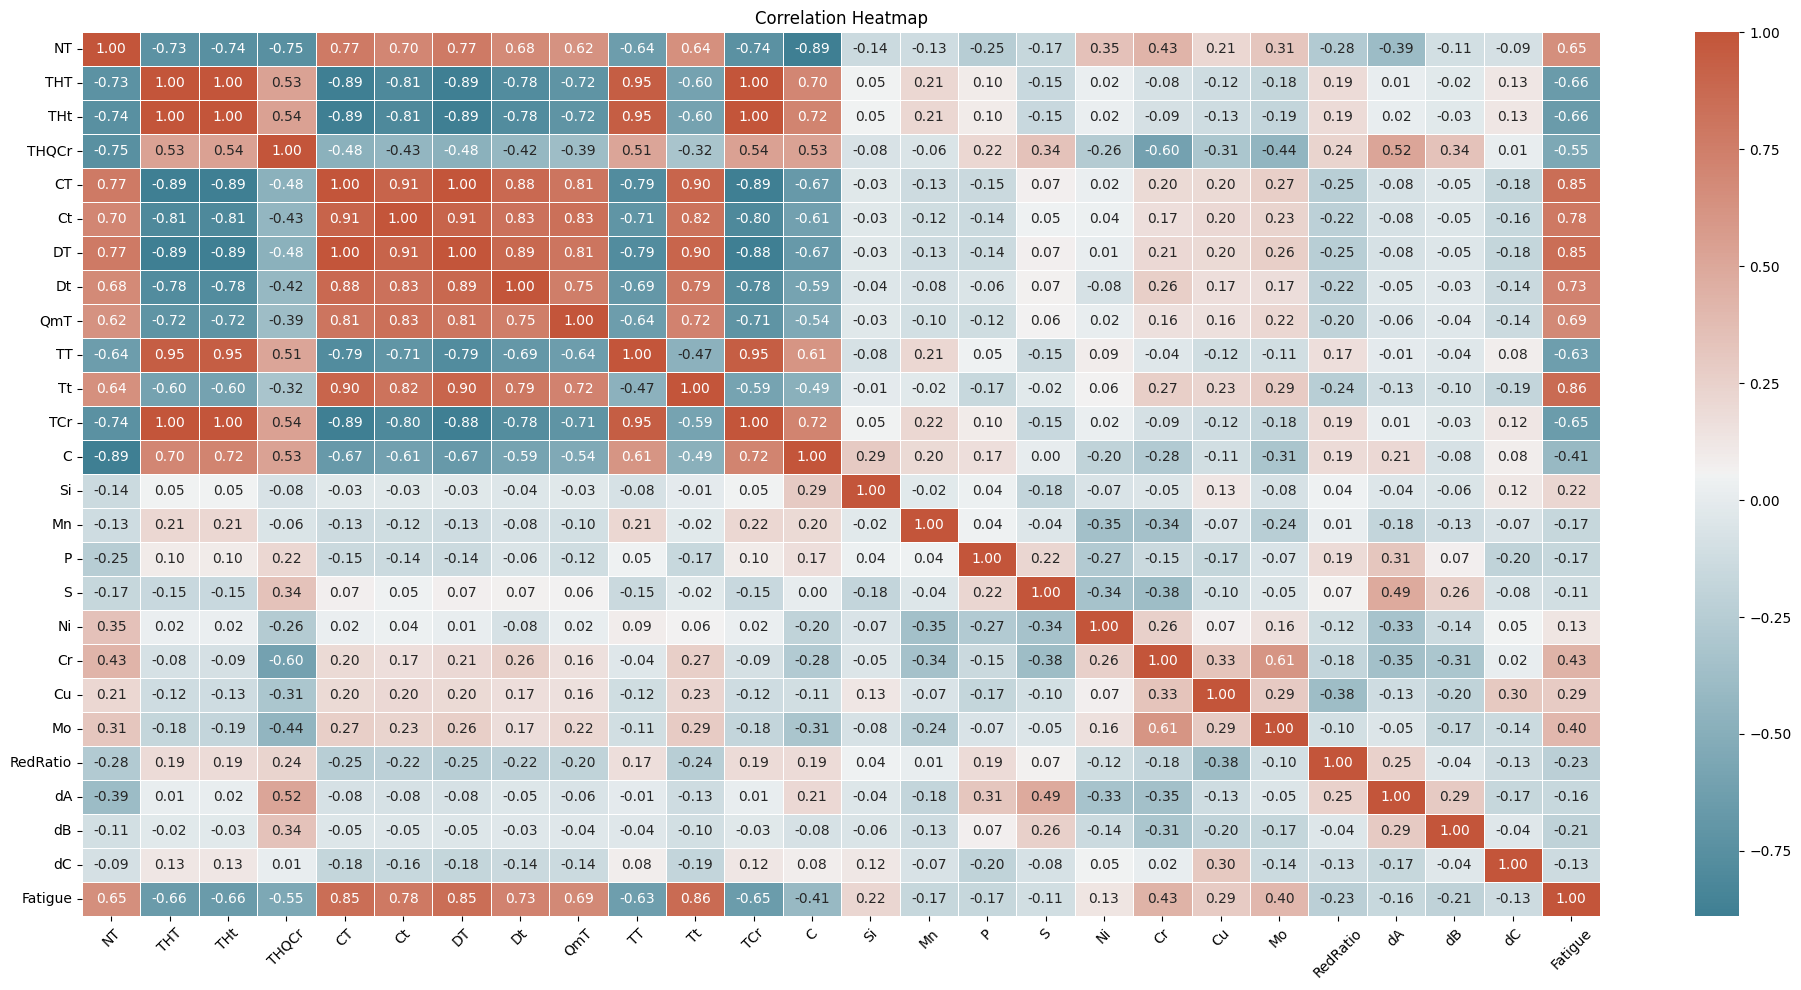

In [8]:
correlation = df.corr()
plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
#Looking for any null value
df.isnull().sum()

NT          0
THT         0
THt         0
THQCr       0
CT          0
Ct          0
DT          0
Dt          0
QmT         0
TT          0
Tt          0
TCr         0
C           0
Si          0
Mn          0
P           0
S           0
Ni          0
Cr          0
Cu          0
Mo          0
RedRatio    0
dA          0
dB          0
dC          0
Fatigue     0
dtype: int64

In [10]:
#Looking for duplicated row
df.duplicated().sum()

0

In [11]:
#Descriptive statics analysis
df.describe()

NT         THT         THt       THQCr          CT          Ct  \
count  437.000000  437.000000  437.000000  437.000000  437.000000  437.000000   
mean   872.299771  737.643021   25.949657   10.654462  128.855835   40.502059   
std     26.212073  280.036541   10.263824    7.841437  281.743539  126.924697   
min    825.000000   30.000000    0.000000    0.000000   30.000000    0.000000   
25%    865.000000  845.000000   30.000000    8.000000   30.000000    0.000000   
50%    870.000000  845.000000   30.000000    8.000000   30.000000    0.000000   
75%    870.000000  855.000000   30.000000    8.000000   30.000000    0.000000   
max    930.000000  865.000000   30.000000   24.000000  930.000000  540.000000   

               DT          Dt         QmT          TT  ...           S  \
count  437.000000  437.000000  437.000000  437.000000  ...  437.000000   
mean   123.699844    4.843936   35.491991  536.842105  ...    0.014611   
std    267.128933   15.700076   19.419277  164.101963  ...    0.006145   
min     30.000000    0.000000   30.000000   30.000000  ...    0.003000   
25%     30.000000    0.000000   30.000000  550.000000  ...    0.010000   
50%     30.000000    0.000000   30.000000  600.000000  ...    0.015000   
75%     30.000000    0.000000   30.000000  650.000000  ...    0.019000   
max    903.333000   70.200000  140.000000  680.000000  ...    0.030000   

               Ni          Cr          Cu          Mo     RedRatio  \
count  437.000000  437.000000  437.000000  437.000000   437.000000   
mean     0.517048    0.570458    0.067780    0.069794   923.629291   
std      0.852976    0.411769    0.049161    0.088124   576.617020   
min      0.010000    0.010000    0.010000    0.000000   240.000000   
25%      0.020000    0.120000    0.020000    0.000000   590.000000   
50%      0.060000    0.710000    0.060000    0.000000   740.000000   
75%      0.460000    0.980000    0.100000    0.170000  1228.000000   
max      2.780000    1.170000    0.260000    0.240000  5530.000000   

               dA          dB          dC      Fatigue  
count  437.000000  437.000000  437.000000   437.000000  
mean     0.047181    0.003391    0.007712   552.903890  
std      0.031093    0.008240    0.010418   186.630528  
min      0.000000    0.000000    0.000000   225.000000  
25%      0.020000    0.000000    0.000000   448.000000  
50%      0.040000    0.000000    0.000000   505.000000  
75%      0.070000    0.000000    0.010000   578.000000  
max      0.130000    0.050000    0.058000  1190.000000  

[8 rows x 26 columns]

#Will go through with every possible method to know the distribution of data.


The distribution of data refers to the pattern or arrangement of values within a dataset. It provides information about how frequently different values occur and the spread or variability of the data. Understanding the distribution of data is important for several reasons:

Summary and Description: Knowing the distribution allows researchers and analysts to summarize and describe the dataset effectively. It provides insights into central tendencies (such as mean, median, and mode) and dispersion (such as variance and standard deviation), which are essential for understanding the overall characteristics of the data.

Inference and Hypothesis Testing: The distribution of data influences the choice of statistical methods and tests used for inference and hypothesis testing. Different statistical tests assume specific distributions (e.g., normal distribution for t-tests and ANOVA). By knowing the distribution, analysts can select appropriate tests and make valid statistical inferences.

Modeling and Prediction: In many data analysis tasks, such as regression analysis or machine learning, understanding the distribution of the target variable and predictors is crucial for building accurate models and making reliable predictions. Models often assume certain distributions for the data, and deviations from these assumptions can affect model performance.

Detection of Anomalies and Outliers: Unusual patterns or outliers in the distribution of data may indicate errors, anomalies, or interesting phenomena. Detecting and understanding these anomalies is essential for quality control, anomaly detection, and identifying potential areas for further investigation.

Decision Making: In business and decision-making contexts, knowing the distribution of key metrics and variables helps stakeholders make informed decisions. For example, understanding the distribution of sales revenue can inform sales forecasts, budget allocations, and resource planning.

The effects of not knowing the distribution of data can be significant:

Misinterpretation of Results: Incorrect assumptions about the distribution of data can lead to biased estimates, inaccurate conclusions, and misinterpretation of results. This can undermine the validity and reliability of analyses and decision-making processes.

Inappropriate Statistical Methods: Using statistical methods or tests that are not suitable for the data distribution can produce misleading or erroneous results. For example, applying parametric tests to non-normally distributed data may yield incorrect p-values and conclusions.

Reduced Predictive Accuracy: Ignoring the distribution of data when building predictive models can result in poor model performance and inaccurate predictions. Models may fail to capture important patterns or relationships present in the data, leading to suboptimal decision-making.

In summary, understanding the distribution of data is essential for accurate analysis, inference, modeling, and decision-making. It enables researchers, analysts, and stakeholders to draw meaningful insights, make reliable predictions, and take informed actions based on the data.

##There are several ways to understand the distribution of data:

###Histograms: Histograms display the frequency distribution of a continuous variable by dividing the data into bins and plotting the number of observations in each bin.

###Density Plots: Density plots estimate the probability density function of a continuous variable, providing a smoother representation of the distribution compared to histograms.

###Box Plots: Box plots summarize the distribution of a continuous variable by displaying its median, quartiles, and potential outliers.

###QQ Plots: Quantile-Quantile plots compare the quantiles of the observed data with the quantiles of a theoretical distribution, such as the normal distribution, to assess if they follow a similar pattern.

###Kernel Density Estimation (KDE): KDE is a non-parametric method for estimating the probability density function of a continuous variable, often used to visualize the distribution of data.

###Empirical Cumulative Distribution Function (ECDF): ECDF plots the cumulative distribution of the data, providing insights into the proportion of observations below a certain value.

###Violin Plots: Violin plots combine elements of box plots and KDE to visualize the distribution of a continuous variable, providing information about both central tendency and variability.

###Frequency Tables: Frequency tables summarize the distribution of categorical variables by displaying the frequency or proportion of each category.

###Bar Plots: Bar plots represent the frequency or proportion of categories in a categorical variable using bars of equal width.

###Pie Charts: Pie charts display the proportion of each category in a categorical variable as slices of a circle, providing a visual representation of the distribution.

#Method-1 Histograms.

In [12]:
def plot_histograms(data):
    # Get numerical columns from the DataFrame
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Set up the matplotlib figure with the appropriate number of subplots
    num_plots = len(numerical_cols)
    num_cols = 3  # Number of columns per row in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Loop through each numerical column and plot a histogram
    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        sns.histplot(data[col], ax=ax, kde=True)  # Plot histogram with kernel density estimate
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

        # Calculate skewness
        skewness = data[col].skew()
        skew_label = 'Positive' if skewness > 0 else 'Negative' if skewness < 0 else 'Symmetric'

        # Add skewness information as text annotation
        ax.text(0.05, 0.9, f'Skewness: {skew_label} ({skewness:.2f})', transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

        # Add median line
        median_value = data[col].median()
        ax.axvline(median_value, color='r', linestyle='--', linewidth=1)

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

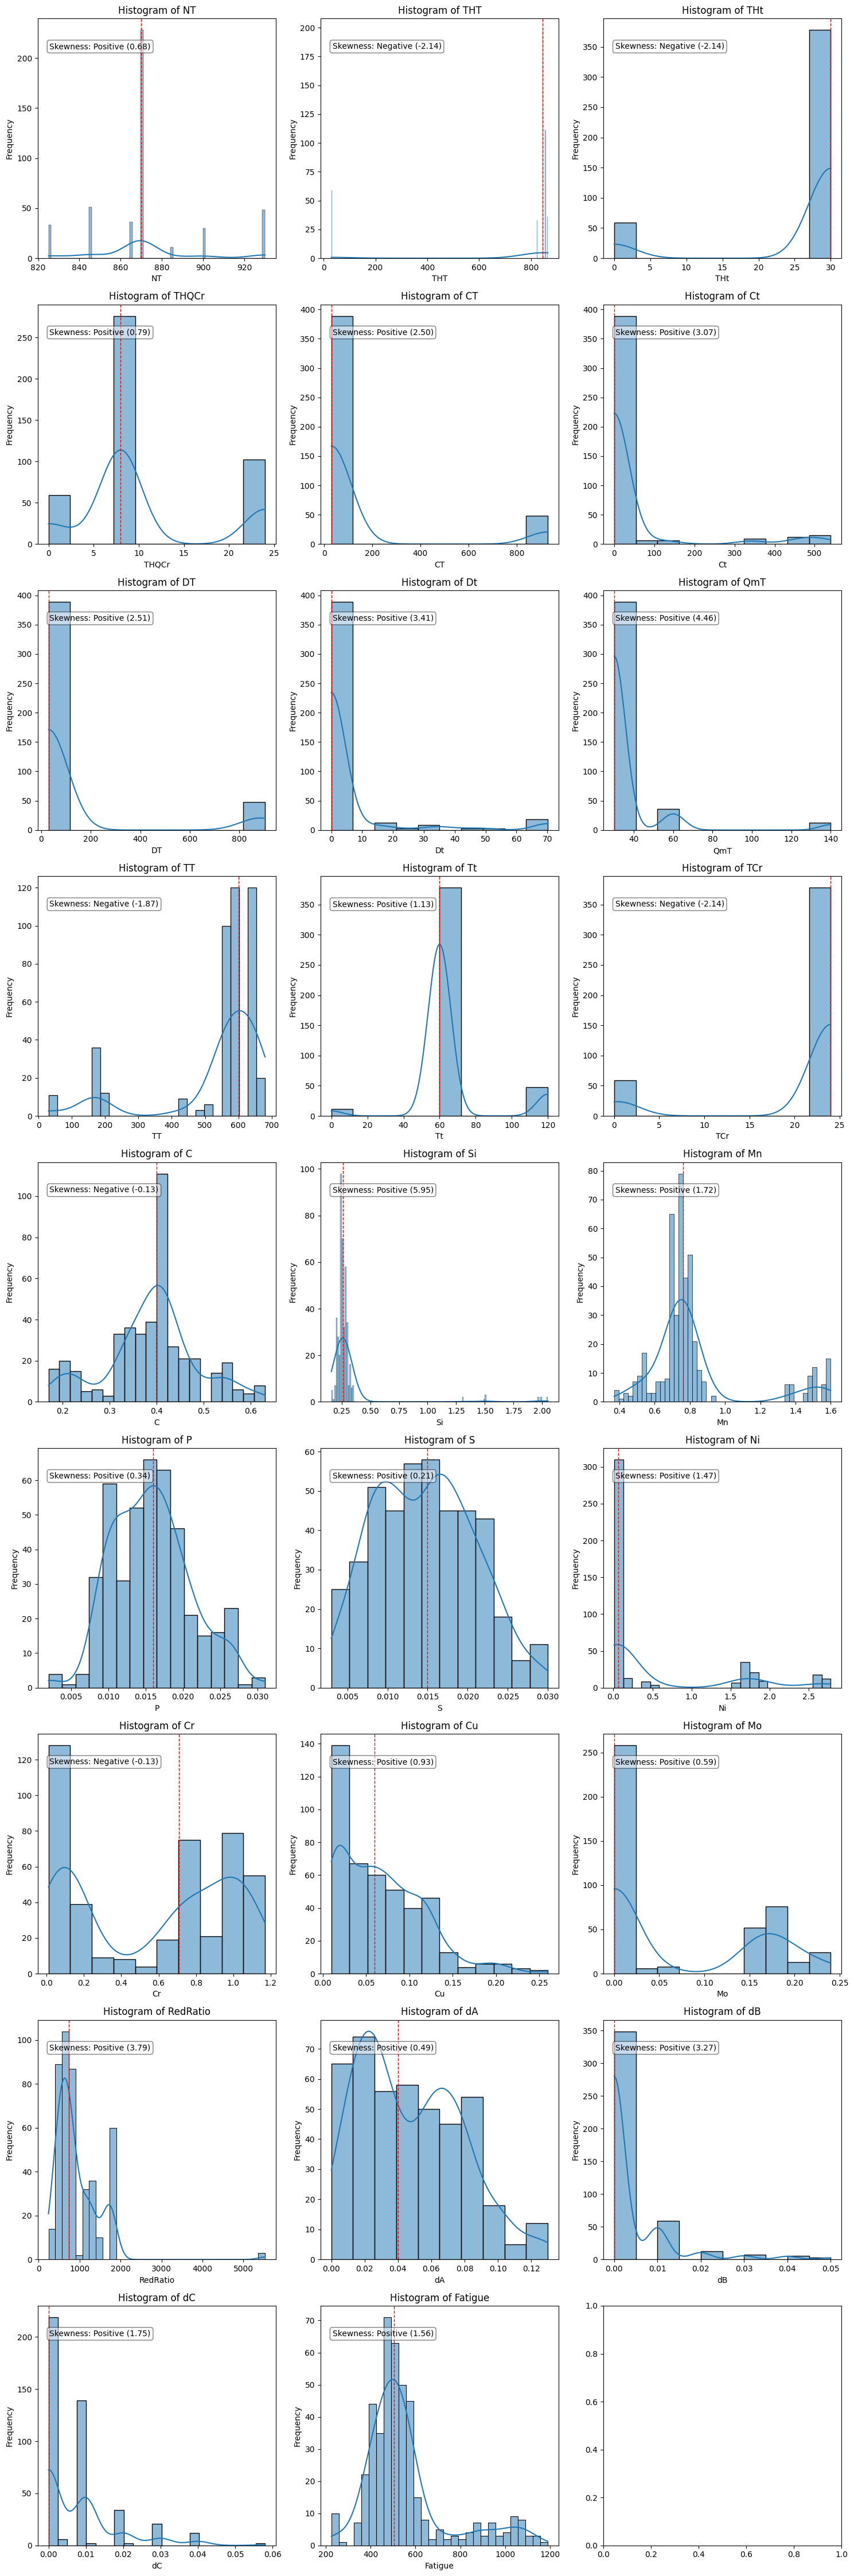

In [13]:
plot_histograms(df)

#Method-2 Box Plot

In [14]:
def plot_boxplots(data):
    # Get numerical columns from the DataFrame
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Set up the matplotlib figure with the appropriate number of subplots
    num_plots = len(numerical_cols)
    num_cols = 3  # Number of columns per row in the subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2.5*num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Loop through each numerical column and plot a box plot
    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        sns.boxplot(x=data[col], ax=ax)
        ax.set_title(f'Box Plot of {col}')
        ax.set_xlabel(col)

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

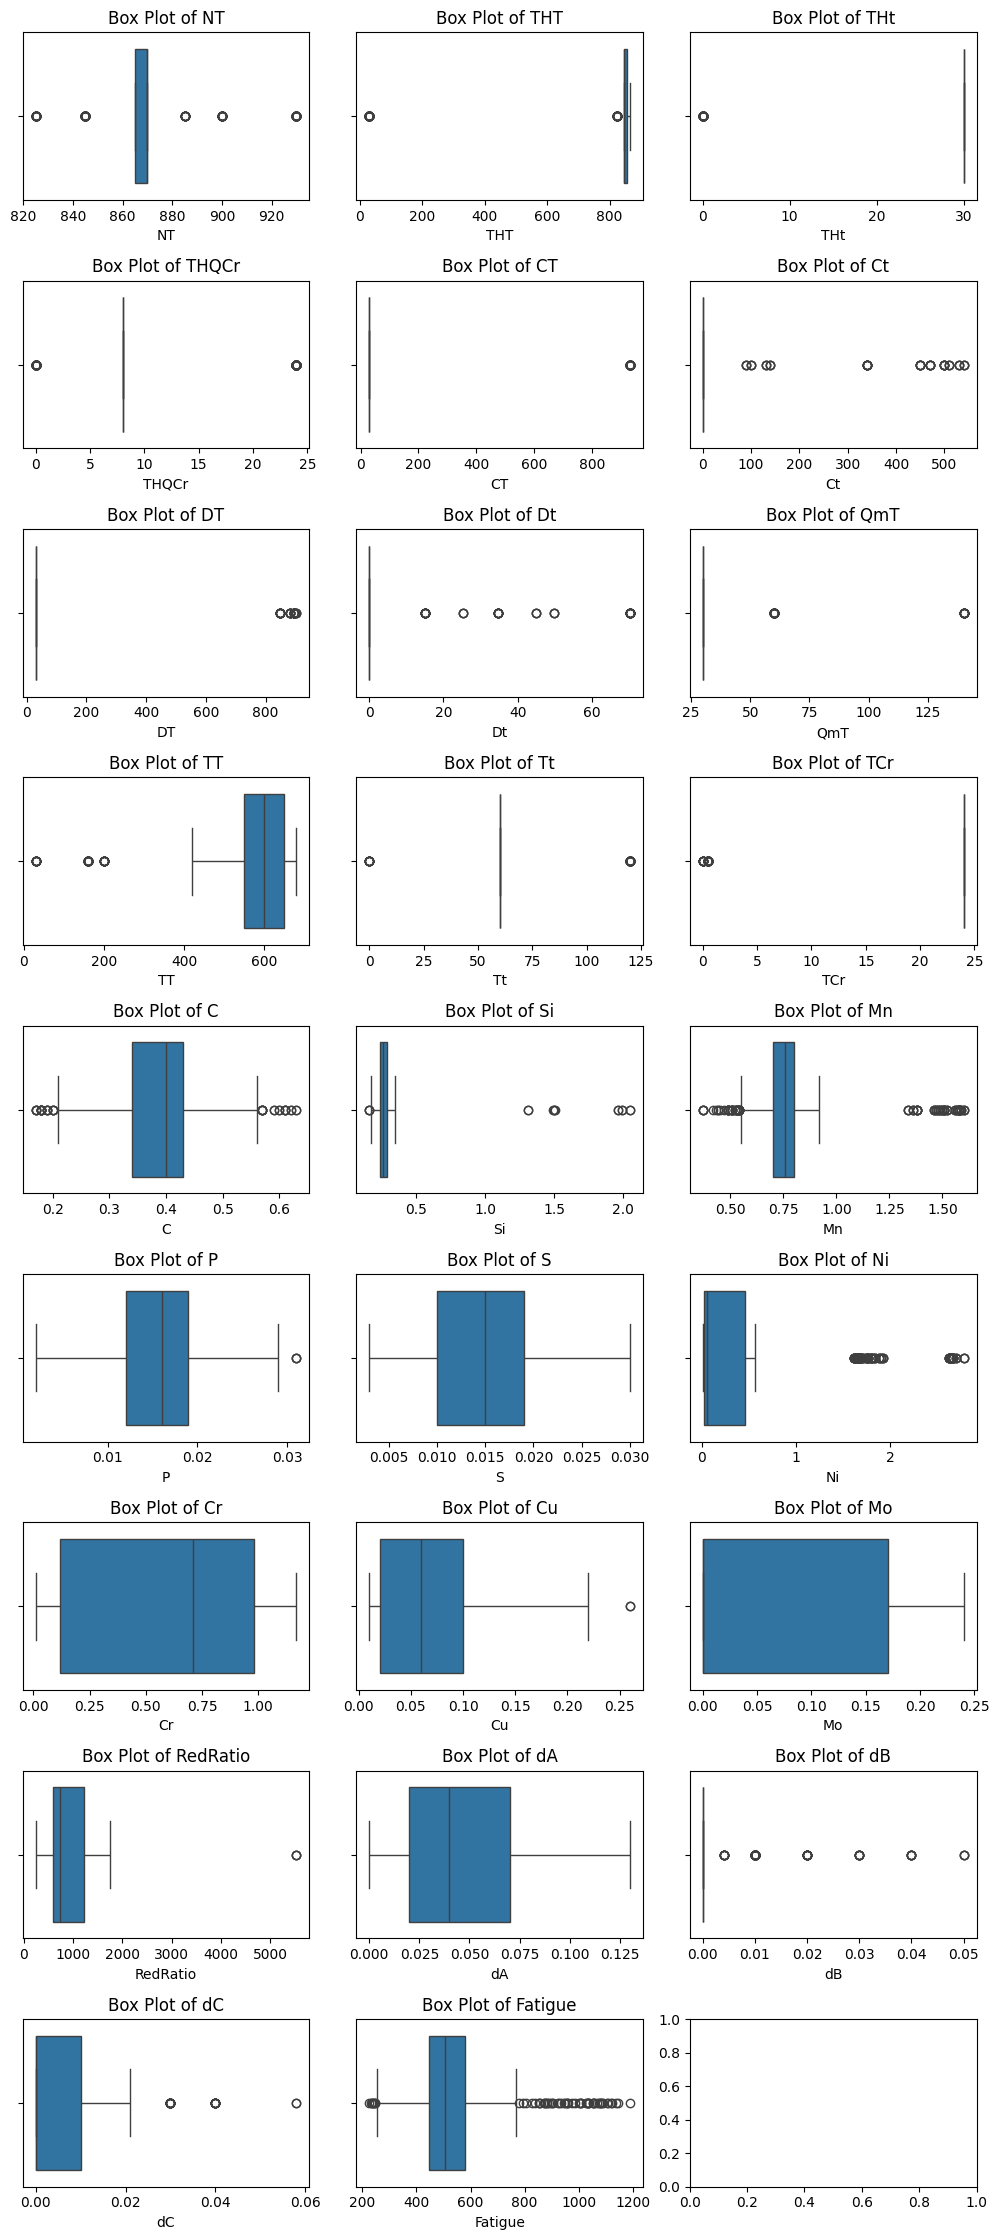

In [15]:
plot_boxplots(df)

#Method-3 Pie chart
###But this method is aplicable when we have categorical variables as of now we do not have any categorical variable.

#Checking the distribution of our data with stastical tests

#Shapiro Wilk Test

In [16]:
from scipy.stats import shapiro

def shapiro_test(data, alpha=0.05):
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data)

    # Print the test result
    print("Shapiro-Wilk Test Result:")
    print("Test Statistic:", stat)
    print("p-value:", p_value)

    # Interpret the test result
    if p_value > alpha:
        print("Conclusion: Fail to reject the null hypothesis (data is normally distributed)")
    else:
        print("Conclusion: Reject the null hypothesis (data is not normally distributed)")

In [17]:
shapiro_test(df)

Shapiro-Wilk Test Result:
Test Statistic: 0.5321153402328491
p-value: 0.0
Conclusion: Reject the null hypothesis (data is not normally distributed)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#2.Kolmogorov-Smirnov Test (Normal Distribution)

In [18]:
from scipy.stats import kstest, norm

def ks_test_normal_for_all_columns(df, alpha=0.05):
    for column in df.columns:
        data = df[column].values.flatten()  # Get values of the current column and flatten to 1D array
        # Perform Kolmogorov-Smirnov test
        stat, p_value = kstest(data, 'norm')

        # Print the test result for the current column
        print(f"Kolmogorov-Smirnov Test Result for column-: {column}:")
        print("Test Statistic:", stat)
        print("p-value:", p_value)

        # Interpret the test result
        if p_value > alpha:
            print("Conclusion: Fail to reject the null hypothesis (data follows a normal distribution)")
        else:
            print("Conclusion: Reject the null hypothesis (data does not follow a normal distribution)")
        print()  # Print an empty line for better readability between columns

# Example usage:
# Assuming df is your DataFrame
ks_test_normal_for_all_columns(df)


Kolmogorov-Smirnov Test Result for column-: NT:
Test Statistic: 1.0
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: THT:
Test Statistic: 1.0
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: THt:
Test Statistic: 0.8649885583524027
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: THQCr:
Test Statistic: 0.8649885583524021
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: CT:
Test Statistic: 1.0
p-value: 0.0
Conclusion: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test Result for column-: Ct:
Test Statistic: 0.5
p-value: 1.5071514723297383e-101
Conclusion: Reject the null hypoth

In [19]:
!pip install ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18101 sha256=b2bb8cc15f858a31ce90ac3539bd5071df8003f7d7cc9b8e96144e9ce93cab6b
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


##In the context of predicting the fatigue strength of steel based on its recipe in a manufacturing process, it may not be necessary or advisable to transform the data to achieve normality. Here's why:

###Nature of Predictive Modeling: Predictive modeling, such as regression or machine learning algorithms, does not necessarily require the input variables to be normally distributed. Instead, the focus is on capturing the relationships between the predictors (steel recipe components) and the target variable (fatigue strength) accurately. Non-parametric techniques or algorithms robust to non-normality can often handle skewed or non-normally distributed predictors effectively.
###Physical Processes: The components of the steel recipe (e.g., composition of alloying elements, processing parameters) are determined by physical and chemical considerations rather than following a normal distribution. Attempting to transform these variables to achieve normality may not reflect the underlying manufacturing process accurately and could lead to misinterpretation or loss of meaningful information.
###Interpretation and Practicality: In many cases, the interpretability of transformed variables in the context of the steel manufacturing process may be limited. For example, applying transformations like logarithmic or power transformations to chemical compositions or processing parameters may not have direct physical interpretations, making it challenging to relate the transformed variables back to practical insights for process optimization.
###Model Performance: The primary goal in predictive modeling is often to build a model that accurately predicts the target variable. Model performance is evaluated based on metrics such as accuracy, precision, or mean squared error, rather than the distributional properties of the predictor variables. As long as the model assumptions are met and the predictive accuracy is satisfactory, the distribution of the predictors may not be critical.
###Robustness of Algorithms: Many machine learning algorithms, such as decision trees, random forests, or gradient boosting machines, are inherently robust to the distributional assumptions of the input variables. These algorithms can handle skewed or non-normally distributed predictors effectively without the need for transformation.
###In summary, in the context of predicting the fatigue strength of steel based on its recipe in a manufacturing process, it may not be advisable to transform the data to achieve normality. Instead, focus on selecting appropriate predictive modeling techniques, ensuring that the chosen algorithms can handle the characteristics of the dataset effectively while maintaining interpretability and practical relevance in the context of steel manufacturing.

####Creating a copy of data set to apply Normality treatment.

In [20]:
df_n=df.copy()

In [21]:
def skewness_detection(df: pd.DataFrame) -> dict:
    skewness_results = {}

    for column in df.columns:
        skewness_coefficient = df[column].skew()

        if skewness_coefficient > 0.5:
            skewness_results[column] = 'Right skewed'
        elif skewness_coefficient <= -0.5:
            skewness_results[column] = 'Left skewed'
        else:
            skewness_results[column] = 'Not skewed'

    return skewness_results

In [22]:
skewness_detection(df_n)

{'NT': 'Right skewed',
 'THT': 'Left skewed',
 'THt': 'Left skewed',
 'THQCr': 'Right skewed',
 'CT': 'Right skewed',
 'Ct': 'Right skewed',
 'DT': 'Right skewed',
 'Dt': 'Right skewed',
 'QmT': 'Right skewed',
 'TT': 'Left skewed',
 'Tt': 'Right skewed',
 'TCr': 'Left skewed',
 'C': 'Not skewed',
 'Si': 'Right skewed',
 'Mn': 'Right skewed',
 'P': 'Not skewed',
 'S': 'Not skewed',
 'Ni': 'Right skewed',
 'Cr': 'Not skewed',
 'Cu': 'Right skewed',
 'Mo': 'Right skewed',
 'RedRatio': 'Right skewed',
 'dA': 'Not skewed',
 'dB': 'Right skewed',
 'dC': 'Right skewed',
 'Fatigue': 'Right skewed'}

In [23]:
def skewness_correction(df: pd.DataFrame) -> pd.DataFrame:
  skewness_coefficients = df.skew()

  for column in df.columns:
    skewness_coefficient = skewness_coefficients[column]
    if skewness_coefficient > 0.5:
      df[column] = np.log(df[column])
    elif skewness_coefficient < -0.5:
      df[column] = np.sqrt(df[column])

  return df

In [24]:
skewness_correction(df_n)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NT       THT  THt  THQCr        CT        Ct        DT        Dt  \
0    6.785588  5.477226  0.0   -inf  3.401197      -inf  3.401197      -inf   
1    6.785588  5.477226  0.0   -inf  3.401197      -inf  3.401197      -inf   
2    6.785588  5.477226  0.0   -inf  3.401197      -inf  3.401197      -inf   
3    6.785588  5.477226  0.0   -inf  3.401197      -inf  3.401197      -inf   
4    6.785588  5.477226  0.0   -inf  3.401197      -inf  3.401197      -inf   
..        ...       ...  ...    ...       ...       ...       ...       ...   
432  6.835185  5.477226  0.0   -inf  6.835185  5.829534  6.797731  4.251348   
433  6.835185  5.477226  0.0   -inf  6.835185  5.829534  6.797731  4.251348   
434  6.835185  5.477226  0.0   -inf  6.835185  5.829534  6.797731  4.251348   
435  6.835185  5.477226  0.0   -inf  6.835185  5.829534  6.797731  4.251348   
436  6.835185  5.477226  0.0   -inf  6.835185  5.829534  6.797731  4.251348   

          QmT         TT  ...      S        Ni    Cr        Cu        Mo  \
0    3.401197   5.477226  ...  0.022 -4.605170  0.02 -4.605170      -inf   
1    3.401197   5.477226  ...  0.017 -2.525729  0.12 -2.525729      -inf   
2    3.401197   5.477226  ...  0.015 -3.912023  0.03 -4.605170      -inf   
3    3.401197   5.477226  ...  0.024 -4.605170  0.02 -4.605170      -inf   
4    3.401197   5.477226  ...  0.022 -4.605170  0.02 -3.912023      -inf   
..        ...        ...  ...    ...       ...   ...       ...       ...   
432  4.941642  12.649111  ...  0.024 -3.912023  0.91 -4.605170 -1.897120   
433  4.941642  12.649111  ...  0.015 -2.659260  1.08 -2.525729 -1.897120   
434  4.094345  14.142136  ...  0.019 -2.813411  1.17 -2.659260 -1.771957   
435  4.094345  14.142136  ...  0.024 -3.912023  0.91 -4.605170 -1.897120   
436  4.094345  14.142136  ...  0.015 -2.659260  1.08 -2.525729 -1.897120   

     RedRatio     dA        dB        dC   Fatigue  
0    6.715383  0.070 -3.912023 -3.218876  5.446737  
1    6.413459  0.110      -inf -3.218876  5.459586  
2    7.146772  0.070 -3.912023      -inf  5.459586  
3    7.461640  0.060      -inf      -inf  5.484797  
4    6.715383  0.040 -3.912023      -inf  5.416100  
..        ...    ...       ...       ...       ...  
432  5.480639  0.050 -4.605170      -inf  6.937314  
433  6.272877  0.017 -5.521461 -4.828314  6.863803  
434  6.536692  0.080      -inf      -inf  7.006695  
435  5.480639  0.050 -4.605170      -inf  6.915723  
436  6.272877  0.017 -5.521461 -4.828314  6.782192  

[437 rows x 26 columns]

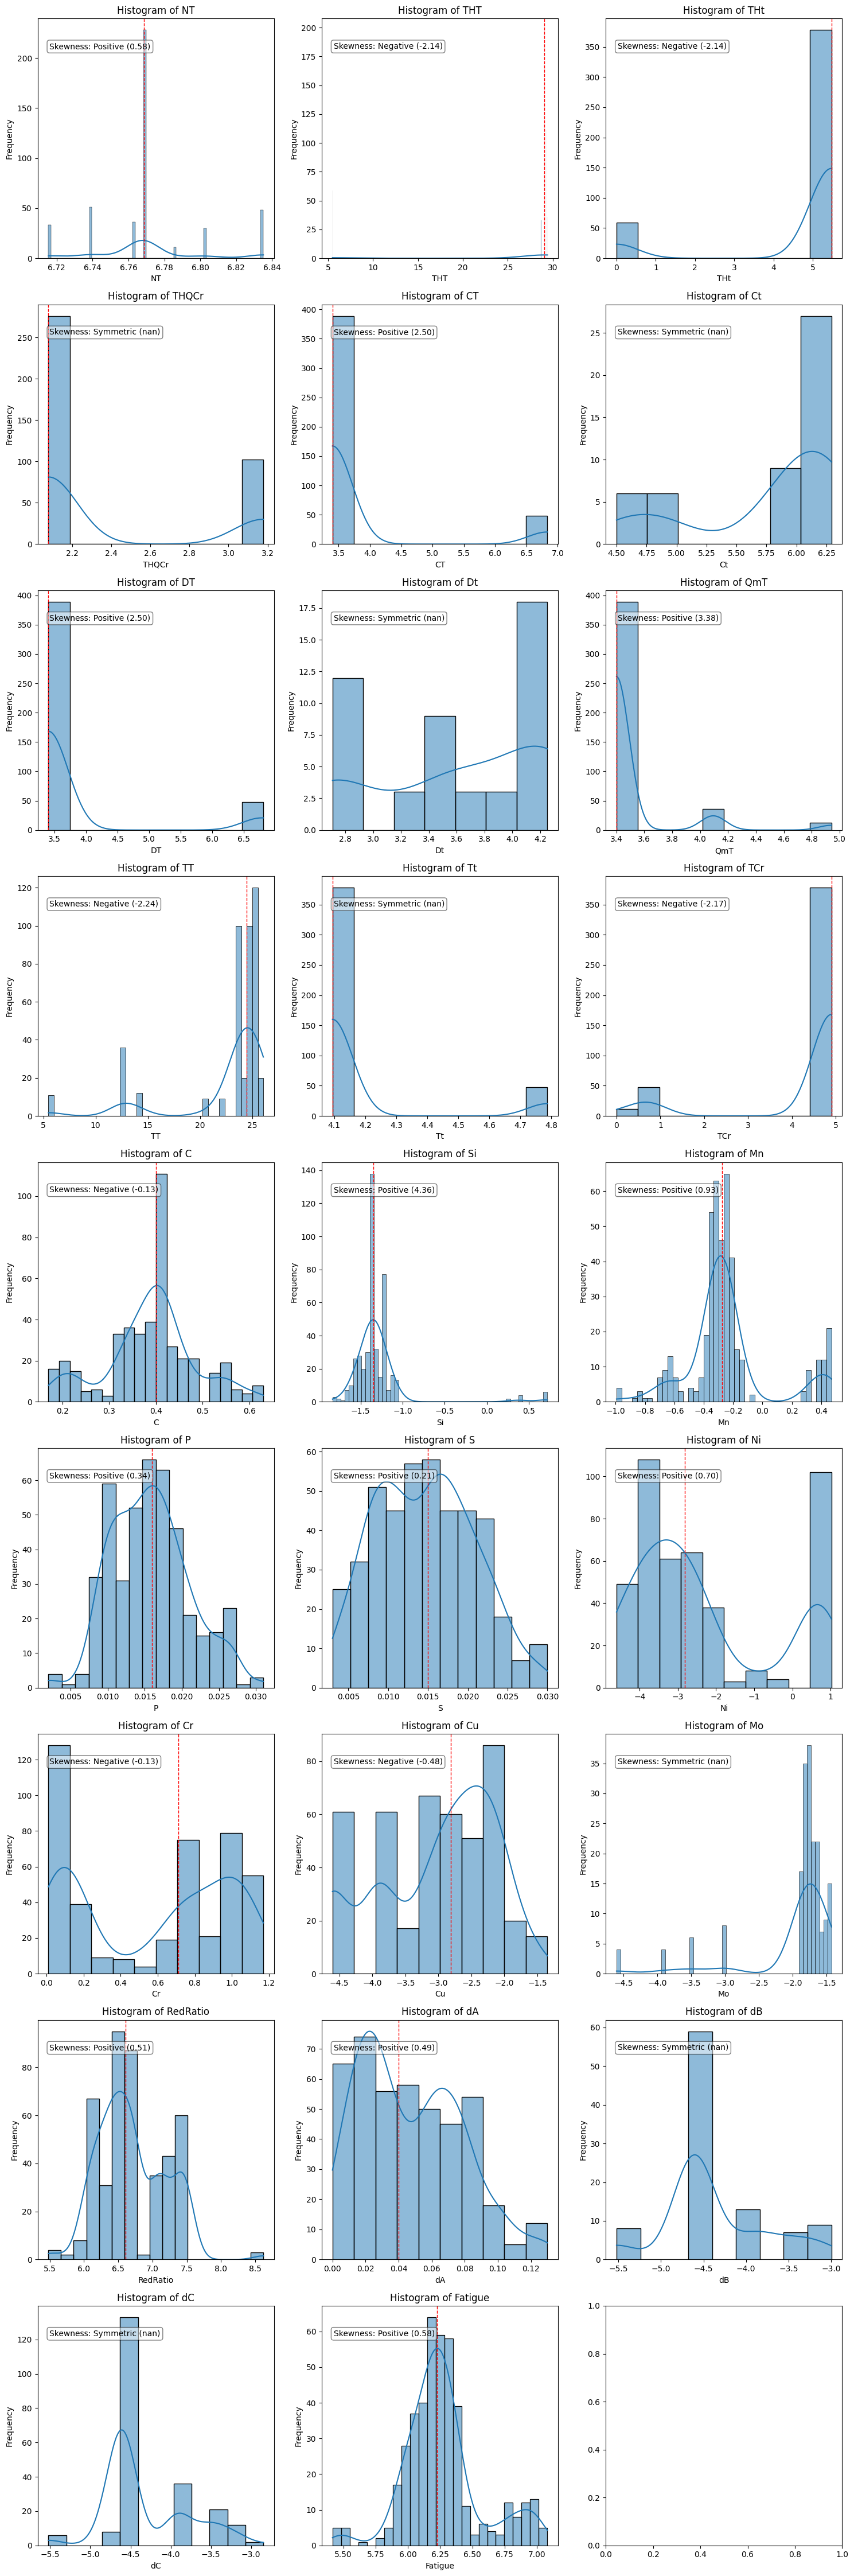

In [25]:
plot_histograms(df_n)


Achieving normality in a dataset can be crucial for certain statistical analyses and modeling techniques. There are several methods to transform data to approximate a normal distribution. Here are some common techniques along with the mathematics and logic behind them:

Logarithmic Transformation:
Mathematics:
�
=
log
⁡
(
�
)
y=log(x) where
�
y is the transformed variable and
�
x is the original variable.
Logic: Logarithmic transformations are useful for reducing skewness in right-skewed distributions. Since the logarithm function compresses larger values more than smaller ones, it can help spread out the data and make it more symmetric.
Square Root Transformation:
Mathematics:
�
=
�
y=
x
​
  where
�
y is the transformed variable and
�
x is the original variable.
Logic: Similar to logarithmic transformation, square root transformation is effective for reducing right skewness. It compresses larger values more than smaller ones, resulting in a more symmetric distribution.
Box-Cox Transformation:
Mathematics:
If
�
λ is not equal to 0:
�
=
�
�
−
1
�
y=
λ
x
λ
 −1
​

If
�
λ is equal to 0:
�
=
log
⁡
(
�
)
y=log(x)
Logic: The Box-Cox transformation is a family of power transformations that includes logarithmic transformation (
�
=
0
λ=0) and square root transformation (
�
=
0.5
λ=0.5) as special cases. By selecting an appropriate value of
�
λ, the Box-Cox transformation aims to stabilize the variance and make the data more normally distributed.
Yeo-Johnson Transformation:
Mathematics: Similar to the Box-Cox transformation but allows for negative and zero values by adding a shift parameter.
Logic: The Yeo-Johnson transformation extends the Box-Cox transformation to handle a wider range of data distributions. It can be useful when dealing with datasets that contain zero or negative values.
Rank Transformation:
Mathematics: Assign ranks to the data values and then transform the ranks to follow a standard normal distribution using the inverse of the cumulative distribution function of the normal distribution (also known as the probit function).
Logic: Rank transformation converts the data into ranks, which reduces the impact of outliers and skewness. By transforming the ranks to follow a standard normal distribution, this method achieves normality without making assumptions about the original data distribution.
Johnson Transformation:
Mathematics: A four-parameter family of transformations that includes logarithmic, exponential, and power transformations. The parameters are estimated from the data to achieve the best fit to a normal distribution.
Logic: The Johnson transformation is a flexible approach that can handle a wide range of data distributions. It iteratively estimates the transformation parameters to maximize the normality of the transformed data.
Each of these transformation methods has its own mathematical formulation and rationale behind its use. The choice of transformation depends on the characteristics of the data and the assumptions of the analysis or modeling technique being applied. It's essential to assess the effectiveness of each transformation method and select the one that best suits the specific requirements of the analysis.

#Multicolinearity

##First of all we will know through how many ways we can detect the multi colinearity.

##Correlation Matrix: Calculate the correlation matrix of the independent variables (features). High correlation coefficients (close to 1 or -1) between pairs of variables indicate potential multicollinearity.

##Variance Inflation Factor (VIF): Calculate the VIF for each independent variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. VIF values greater than 5 or 10 are often considered indicative of multicollinearity.

##Eigenvalues: Compute the eigenvalues of the correlation matrix. If you have one or more small eigenvalues close to zero, it indicates the presence of multicollinearity.

##Condition Number: Calculate the condition number, which is the ratio of the largest eigenvalue to the smallest eigenvalue of the correlation matrix. A condition number greater than 30 suggests multicollinearity.

##Tolerance: Calculate the tolerance for each independent variable. Tolerance is the proportion of variance in a predictor variable that is not explained by the other predictors. A tolerance value close to 0 indicates multicollinearity.

##Visual Inspection: Scatterplot matrices or pair plots can provide a visual representation of the relationships between variables, helping to identify multicollinearity.

##Regression Coefficients: Examine the coefficients of the regression model. If coefficients are not consistent with theory or change dramatically when adding or removing variables, it may indicate multicollinearity.

##Principal Component Analysis (PCA): Perform PCA on the independent variables and examine the explained variance ratio. A few principal components explaining most of the variance suggest multicollinearity.

##Residual Analysis: Check the residuals of the regression model for patterns or unusual behavior. Multicollinearity can affect the stability of parameter estimates and lead to unusual residuals.

#Method_1 correlation Matrix.

#This method works on pearson correlation formula

In [26]:
correlation=df.corr()

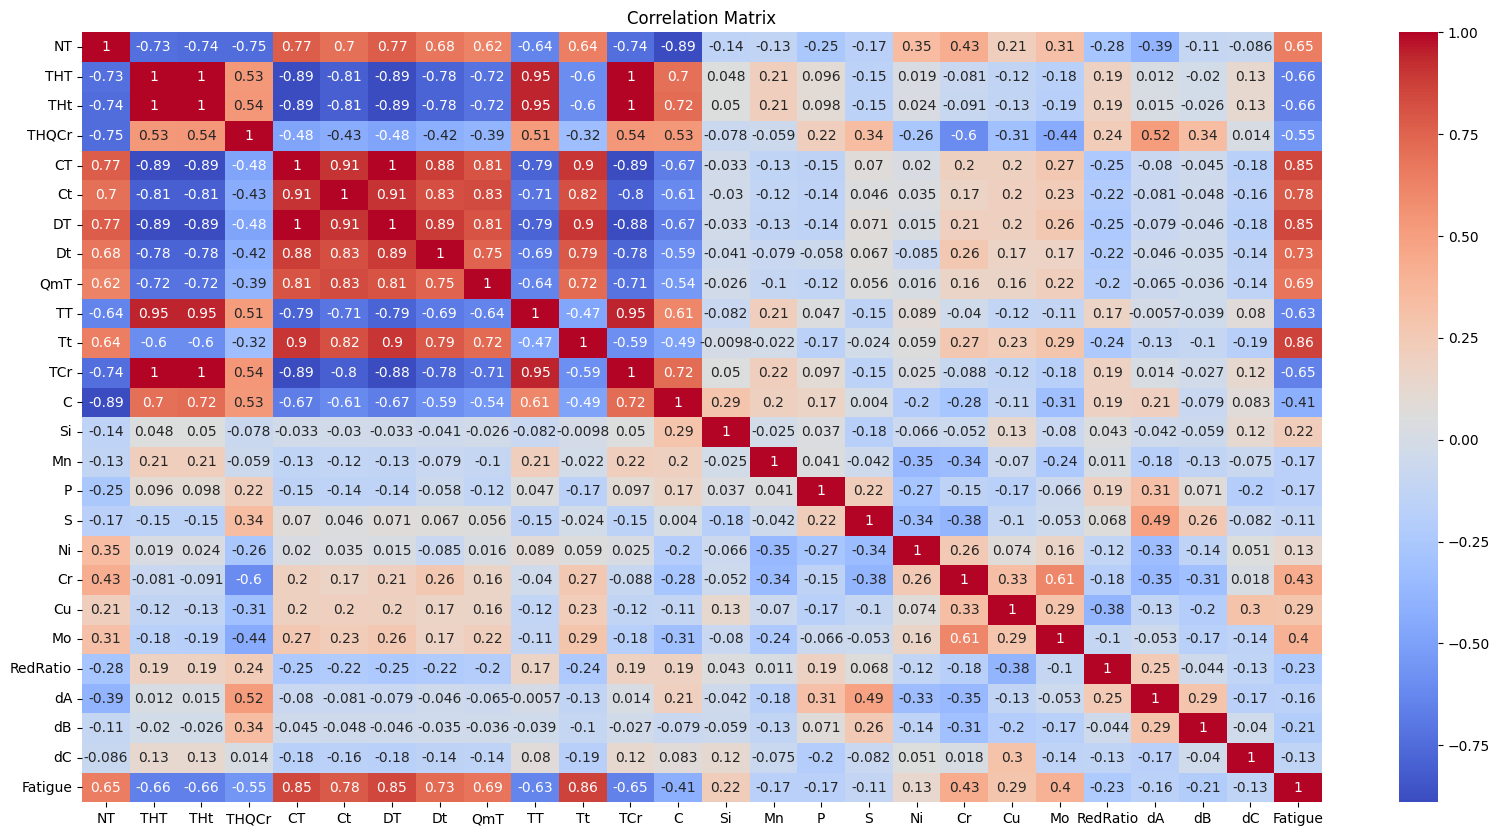

In [27]:
plt.figure(plt.figure(figsize=(20,10)))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
#Finding out the Pair of features which are highly correlated
def correlated_feature_pair_finder(df,threashold=0.7):
  correlation_matrix=df.corr()
  correlated_pairs=[]
  for i in range (len(correlation_matrix.columns)):
    for j in range(i+1,len(correlation_matrix.columns)):
      if abs(correlation_matrix.iloc[i,j])>threashold:
        pairs=(correlation_matrix.columns[i],correlation_matrix.columns[j])
        correlated_pairs.append(pairs)
  return correlated_pairs

In [29]:
correlated_feature_pair_finder(df)

[('NT', 'THT'),
 ('NT', 'THt'),
 ('NT', 'THQCr'),
 ('NT', 'CT'),
 ('NT', 'Ct'),
 ('NT', 'DT'),
 ('NT', 'TCr'),
 ('NT', 'C'),
 ('THT', 'THt'),
 ('THT', 'CT'),
 ('THT', 'Ct'),
 ('THT', 'DT'),
 ('THT', 'Dt'),
 ('THT', 'QmT'),
 ('THT', 'TT'),
 ('THT', 'TCr'),
 ('THT', 'C'),
 ('THt', 'CT'),
 ('THt', 'Ct'),
 ('THt', 'DT'),
 ('THt', 'Dt'),
 ('THt', 'QmT'),
 ('THt', 'TT'),
 ('THt', 'TCr'),
 ('THt', 'C'),
 ('CT', 'Ct'),
 ('CT', 'DT'),
 ('CT', 'Dt'),
 ('CT', 'QmT'),
 ('CT', 'TT'),
 ('CT', 'Tt'),
 ('CT', 'TCr'),
 ('CT', 'Fatigue'),
 ('Ct', 'DT'),
 ('Ct', 'Dt'),
 ('Ct', 'QmT'),
 ('Ct', 'TT'),
 ('Ct', 'Tt'),
 ('Ct', 'TCr'),
 ('Ct', 'Fatigue'),
 ('DT', 'Dt'),
 ('DT', 'QmT'),
 ('DT', 'TT'),
 ('DT', 'Tt'),
 ('DT', 'TCr'),
 ('DT', 'Fatigue'),
 ('Dt', 'QmT'),
 ('Dt', 'Tt'),
 ('Dt', 'TCr'),
 ('Dt', 'Fatigue'),
 ('QmT', 'Tt'),
 ('QmT', 'TCr'),
 ('TT', 'TCr'),
 ('Tt', 'Fatigue'),
 ('TCr', 'C')]

#Method_2 Variance threashold

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each independent variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical independent variables.

    Returns:
    DataFrame: DataFrame containing VIF values for each independent variable.
    """
    # Create a DataFrame to store the VIF values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif_data

In [31]:
calculate_vif(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variable           VIF
0         NT  7.452070e+01
1        THT  5.830393e+03
2        THt           inf
3      THQCr  3.545056e+01
4         CT  9.141562e+06
5         Ct  7.941285e+00
6         DT  4.753179e+03
7         Dt  1.544005e+01
8        QmT  3.498713e+00
9         TT  3.891627e+01
10        Tt           inf
11       TCr           inf
12         C  1.946741e+01
13        Si  2.781973e+00
14        Mn  1.153171e+01
15         P  1.325112e+00
16         S  1.784147e+00
17        Ni  1.011719e+01
18        Cr  1.878475e+01
19        Cu  1.792591e+00
20        Mo  3.908974e+00
21  RedRatio  1.383597e+00
22        dA  2.431407e+00
23        dB  1.494857e+00
24        dC  1.404807e+00
25   Fatigue  3.552571e+01

Interpretation:
VIF = 1: No multicollinearity. The variance of the coefficient estimate is not inflated.
VIF between 1 and 5: Moderate multicollinearity. The variance of the coefficient estimate is moderately inflated.
VIF greater than 5: High multicollinearity. The variance of the coefficient estimate is significantly inflated.

#Method-3 Visual Inspection Pair Plot

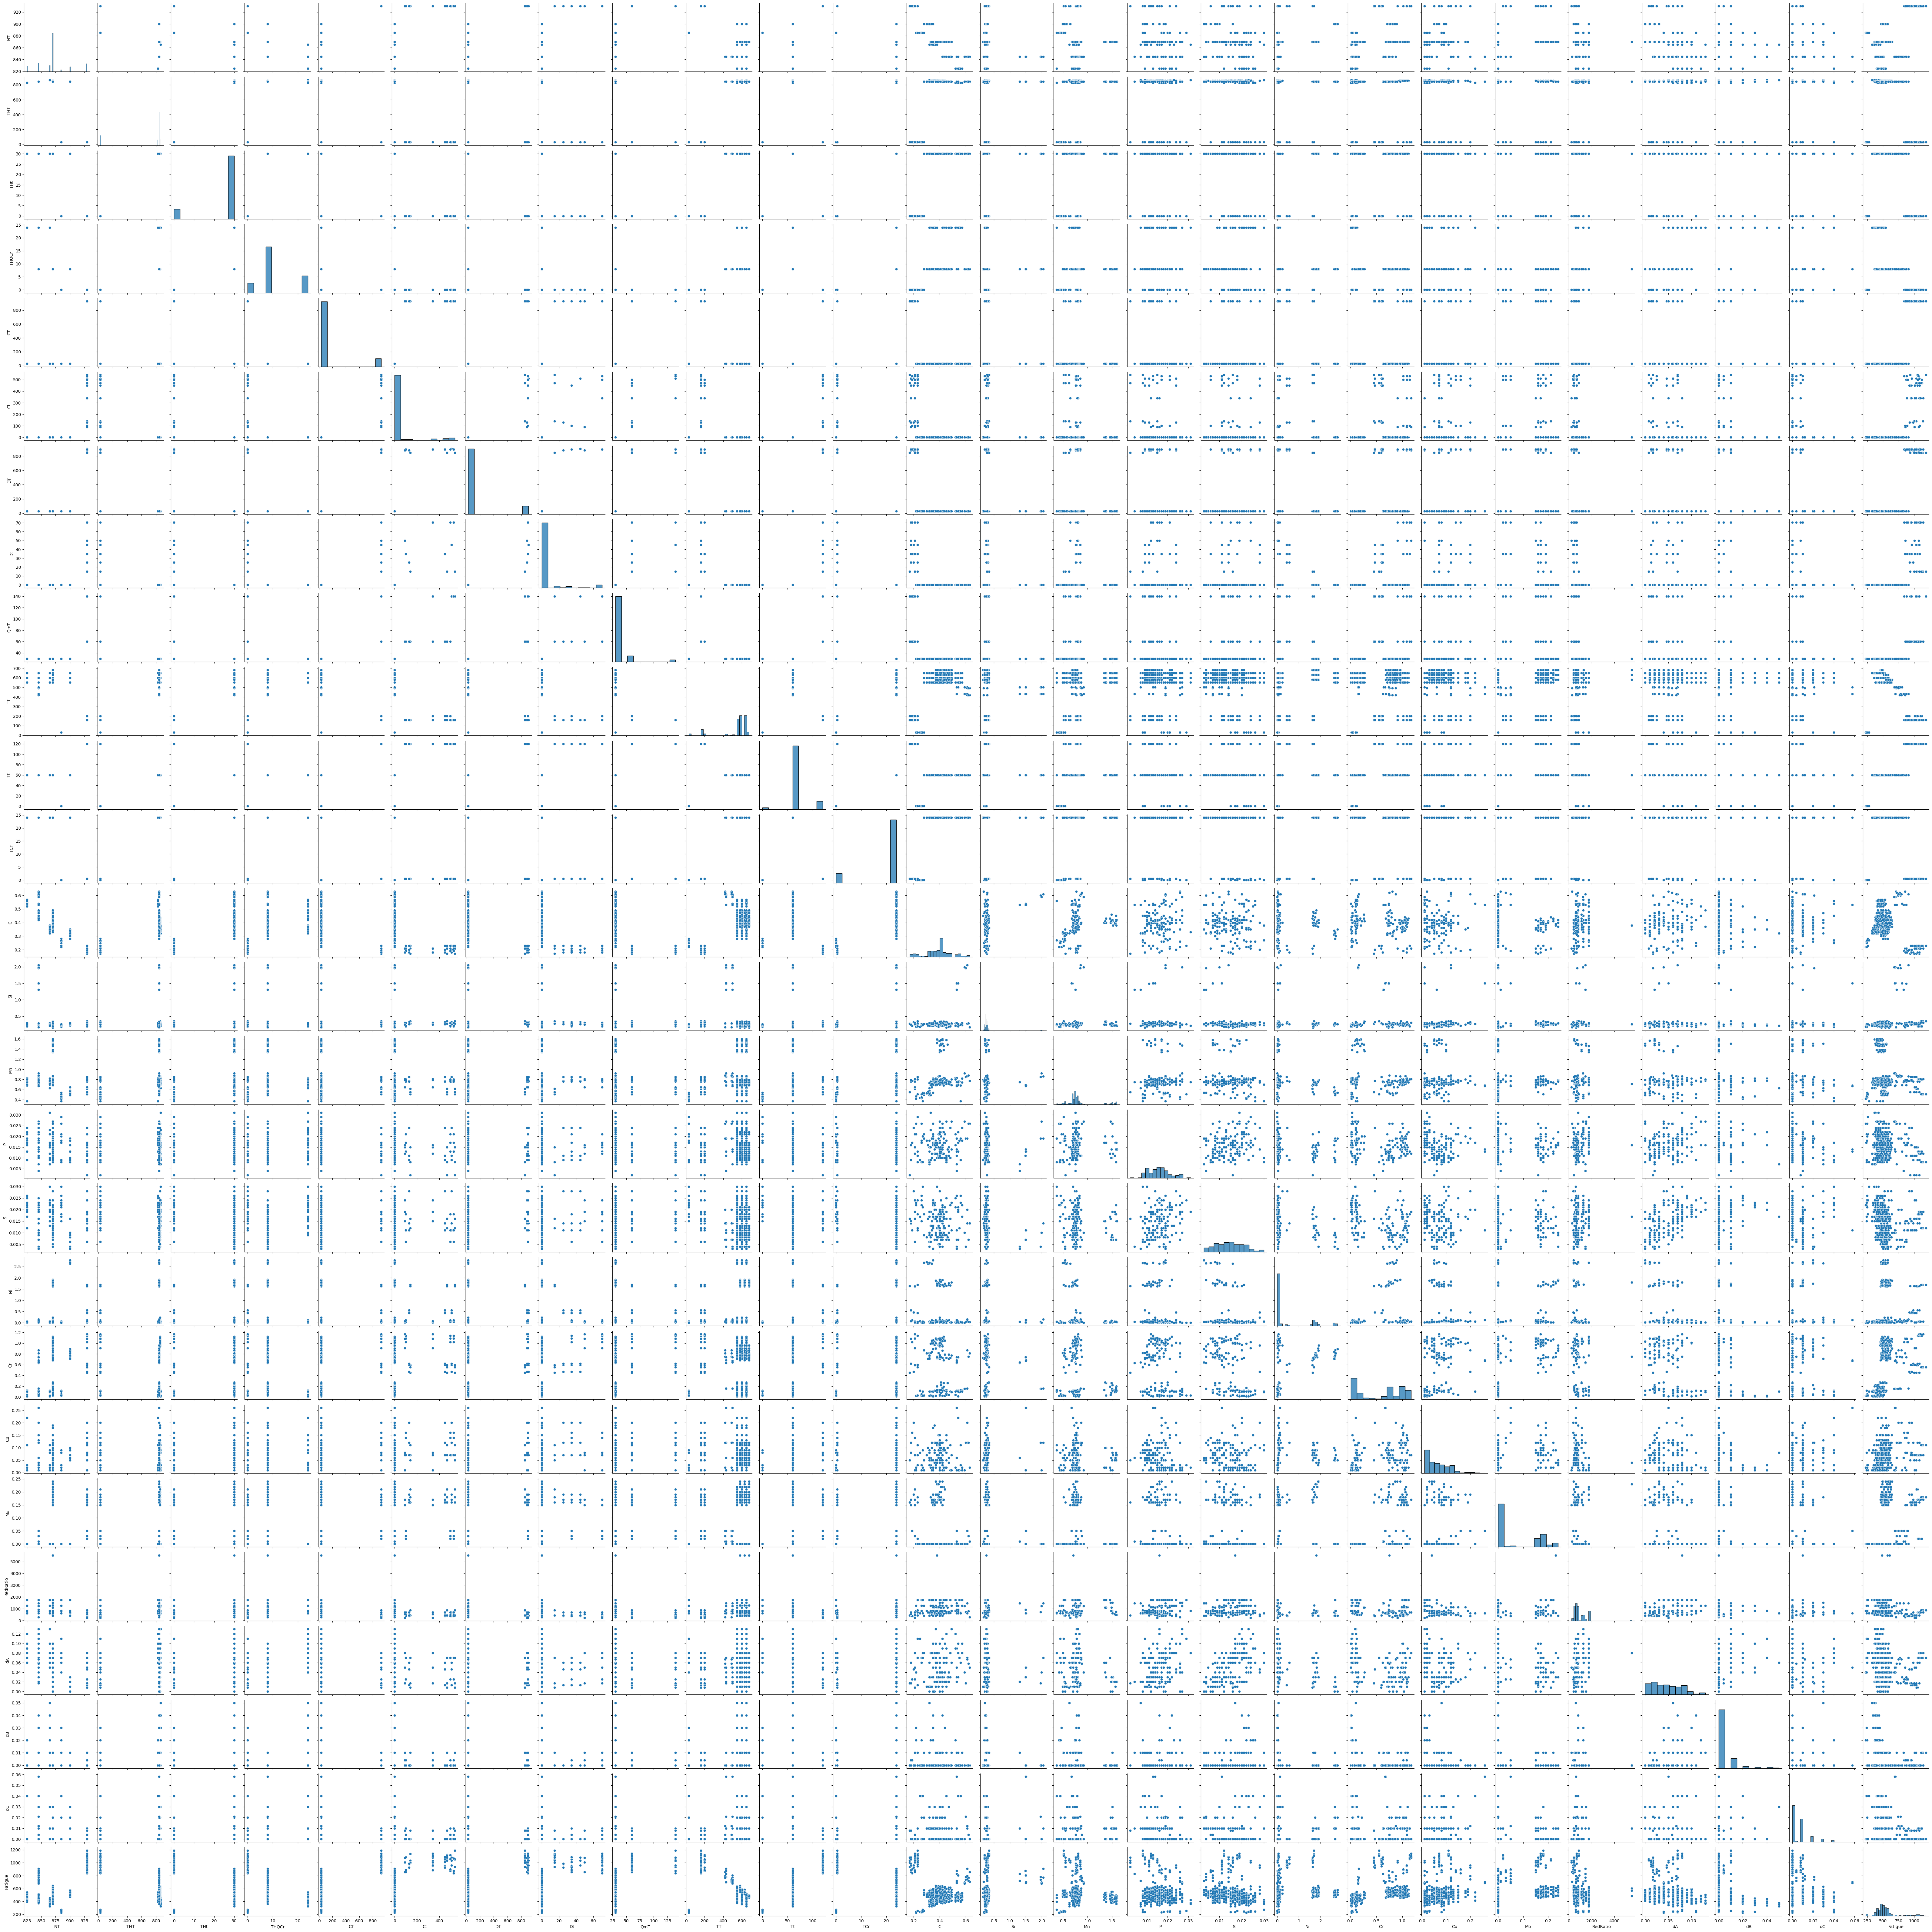

In [32]:
sns.pairplot(df)
plt.show()

#Multicollinearity can be treated or mitigated using various techniques. Here are some common approaches:

##Feature Selection: Remove one or more correlated variables from the model. This can be done based on domain knowledge, variable importance measures, or by using automated feature selection methods such as forward/backward selection, LASSO regression, or recursive feature elimination.

##Principal Component Analysis (PCA): Transform the original variables into a smaller set of uncorrelated variables (principal components) that capture most of the variability in the data. PCA can help reduce multicollinearity by creating orthogonal components, but it may make the interpretation of the model more complex.

##Partial Least Squares (PLS): PLS regression is similar to PCA but is designed specifically for regression problems. It constructs a set of orthogonal factors that explain the maximum covariance between the predictors and the response variable. PLS can be used to reduce multicollinearity while preserving predictive power.

##Regularization Techniques: Techniques like Ridge Regression and LASSO Regression add a penalty term to the regression model, which helps to shrink the coefficients of correlated variables towards zero. Ridge Regression penalizes the squared magnitude of coefficients, while LASSO Regression penalizes the absolute magnitude. These methods can effectively reduce multicollinearity and improve model performance.

##Combining Variables: Create new variables by combining or aggregating correlated variables. For example, instead of including both "number of bedrooms" and "number of bathrooms" separately in a model, you could create a new variable representing the total number of rooms.

##Data Collection: Collect more data to increase the sample size. Increasing the sample size can sometimes help mitigate multicollinearity by providing more information about the relationships between variables.

##Model Comparison: Compare the performance of models with and without correlated variables using techniques like cross-validation or information criteria (e.g., AIC, BIC). Select the model that achieves the best balance between simplicity and predictive accuracy.

##Reasons Not to Cure Multicollinearity:
Natural Relationships: Multicollinearity may arise naturally in the dataset due to inherent relationships between variables in the steel recipe. For example, certain alloying elements or processing parameters may co-occur in specific types of steel compositions or manufacturing processes. In such cases, multicollinearity may not necessarily indicate a problem with the model.
Predictive Performance: Multicollinearity may not significantly impact the predictive performance of the model, especially if the primary goal is to accurately predict the strength of steel rather than to infer individual variable effects. Modern machine learning algorithms are often robust to multicollinearity and can effectively handle correlated predictors.

#Feature Selection

#Mutual Information Gain.

In [33]:
from sklearn.feature_selection import mutual_info_regression

In [34]:
x=df.drop('Fatigue',axis=1)
y=df['Fatigue']

In [35]:
mutual_info_regression_results=mutual_info_regression(x,y)

In [36]:
mutual_info_regression_results

array([0.86965843, 0.61251191, 0.36792025, 0.58146462, 0.32442258,
       0.32718052, 0.33395318, 0.32091776, 0.32168801, 0.97936619,
       0.44748061, 0.43081265, 0.5073828 , 0.12431025, 0.2872757 ,
       0.09817209, 0.1095216 , 0.3090485 , 0.64198983, 0.18802999,
       0.41045905, 0.26184668, 0.25137749, 0.17700953, 0.06604283])

In [37]:
def plot_mutual_info(x, y):
    # Get feature names from DataFrame columns
    feature_names = x.columns.tolist()

    # Calculate mutual information scores
    mi_scores = mutual_info_regression(x, y)

    # Sort features based on mutual information scores
    sorted_indices = np.argsort(mi_scores)
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_mi_scores = [mi_scores[i] for i in sorted_indices]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_mi_scores, align='center')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Mutual Information Gain')
    plt.ylabel('Features')
    plt.title('Mutual Information Gain for Features')
    plt.show()

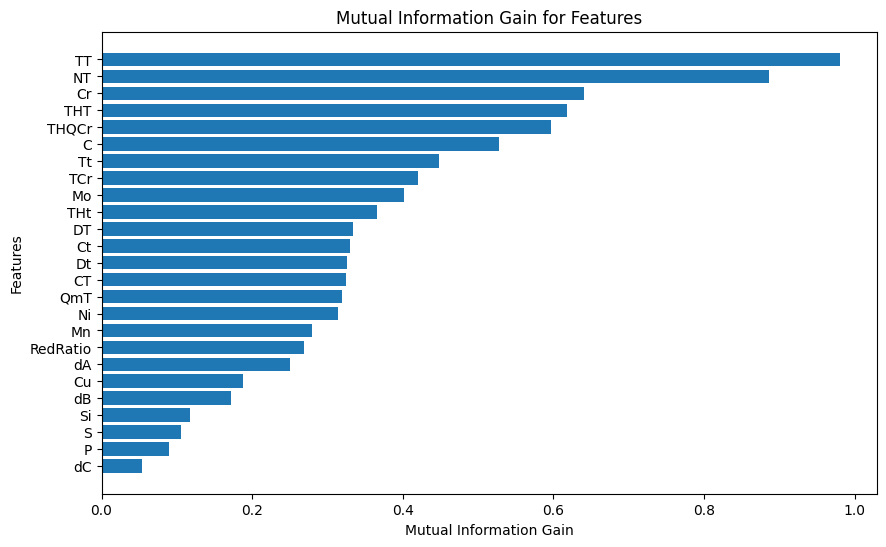

In [38]:
plot_mutual_info(x, y)

#2.F-regression

In [39]:
from sklearn.feature_selection import f_regression
def plot_f_test(x, y):
    # Get feature names from DataFrame columns
    feature_names = x.columns.tolist()

    # Calculate F-statistic and p-values
    f_scores, p_values = f_regression(x, y)

    # Sort features based on F-statistic
    sorted_indices = np.argsort(f_scores)
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_f_scores = [f_scores[i] for i in sorted_indices]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_f_scores, align='center')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('F-Statistic')
    plt.ylabel('Features')
    plt.title('F-Statistic for Numerical Features')
    plt.show()

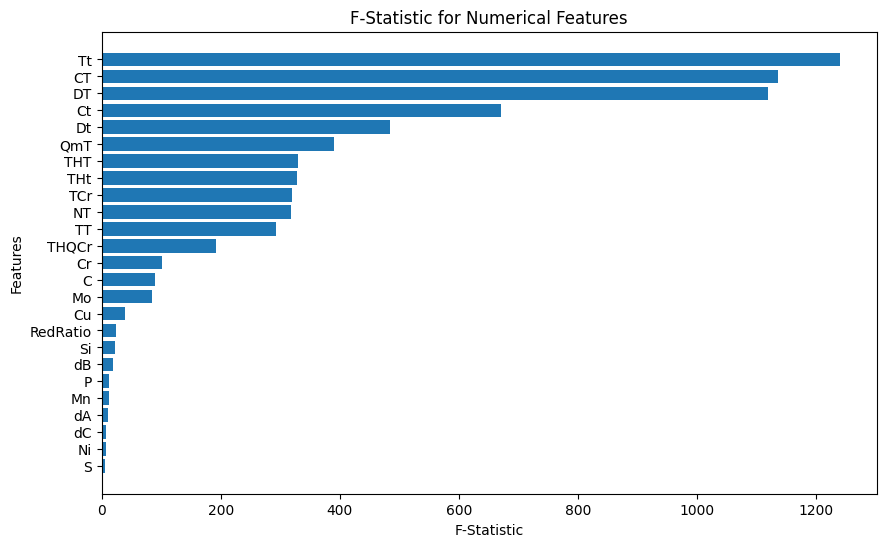

In [40]:
plot_f_test(x, y)

#3.Chi-square

In [41]:
from sklearn.feature_selection import chi2

def plot_chi2(x, y):
    # Get feature names from DataFrame columns
    feature_names = x.columns.tolist()

    # Calculate chi-squared statistic and p-values
    chi2_scores, p_values = chi2(x, y)

    # Sort features based on chi-squared scores
    sorted_indices = np.argsort(chi2_scores)
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    sorted_chi2_scores = [chi2_scores[i] for i in sorted_indices]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_feature_names)), sorted_chi2_scores, align='center')
    plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
    plt.xlabel('Chi-Squared Statistic')
    plt.ylabel('Features')
    plt.title('Chi-Squared Statistic for Categorical Features')
    plt.show()

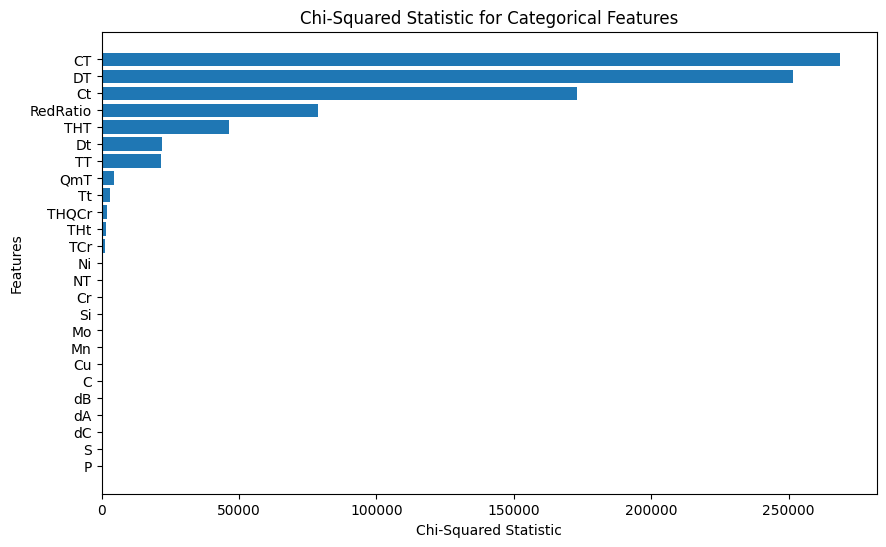

In [42]:
plot_chi2(x, y)

#Recursive feature elimination

In [43]:
# Define the estimator (Linear Regression)
estimator = LinearRegression()

In [44]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector
def rfe_feature_selection(estimator, x, y, n_features_to_select):
    rfe = RFE(estimator, n_features_to_select= n_features_to_select)
    rfe.fit(x, y)
    selected_features = x.columns[rfe.support_]
    return selected_features

In [45]:
rfe_feature_selection(estimator, x, y,10)

Index(['C', 'Si', 'P', 'S', 'Cr', 'Cu', 'Mo', 'dA', 'dB', 'dC'], dtype='object')

#Outliers.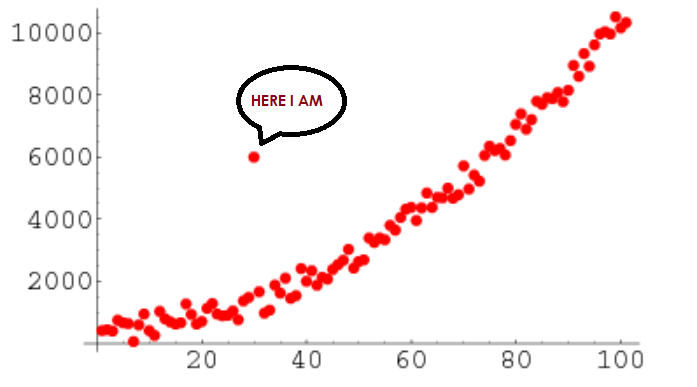

"Outliers are data points in a dataset that significantly deviate from the rest of the observations. These anomalies may arise due to measurement errors, natural variability, or rare events. Detecting and handling outliers is crucial in data analysis and modeling as they can skew statistical results and machine learning predictions if not appropriately addressed."

Natural outliers: In many cases, outliers occur naturally as part of the variability or randomness inherent in data. For example, in a dataset of human heights, an exceptionally tall or short individual could be considered a natural outlier. Similarly, in financial data, extreme market events such as stock market crashes or economic recessions can lead to natural outliers.

Artificial outliers: Sometimes outliers are created artificially due to errors in data collection, measurement, or recording. These errors can include typos, sensor malfunctions, or human mistakes. For instance, recording a person's height in centimeters instead of meters could result in artificially high values that appear as outliers in the dataset.

#Method-1 Z-Score Method

In [46]:
def count_outliers_zscore(data, threshold=3):
   # Calculate z-scores for each column using vectorized operations for efficiency
  z_scores = (data - data.mean(axis=0)) / data.std(axis=0)

  # Count outliers based on the specified threshold (consider both positive and negative deviations)
  outlier_counts = ((z_scores.abs() > threshold).sum(axis=0))

  return outlier_counts


In [47]:
#creating a copy of dataset to simulate the results so that our original data stay original.
df_o=df.copy()

In [48]:
outlier=count_outliers_zscore(df_o, threshold=3)

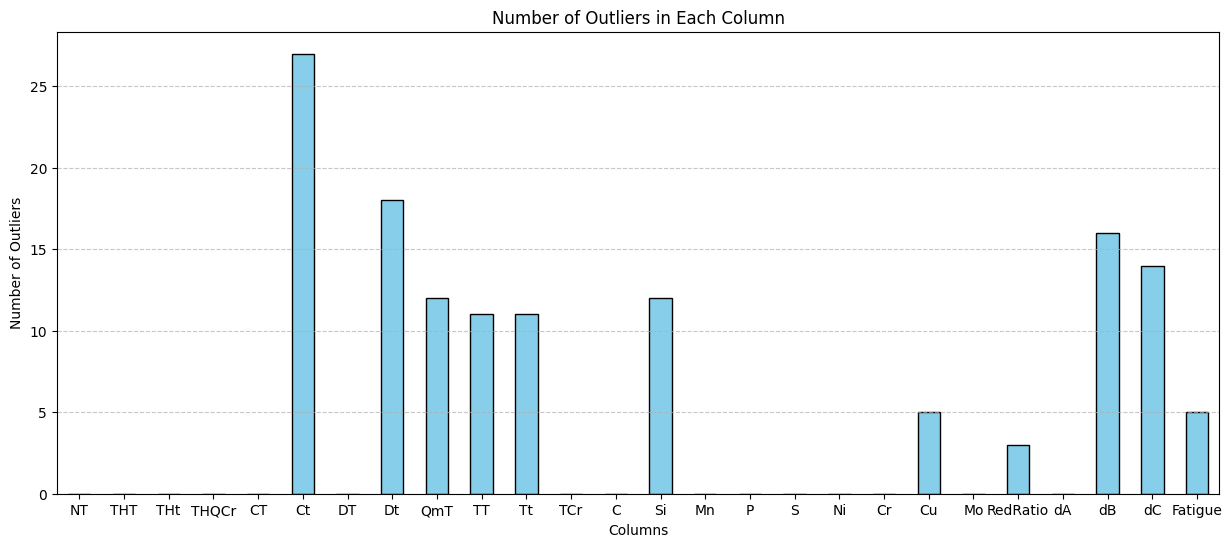

In [49]:
# Plot the results
outlier.plot(kind='bar', figsize=(15, 6), color='skyblue', edgecolor='black')
plt.title('Number of Outliers in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Method 2 Boxplots

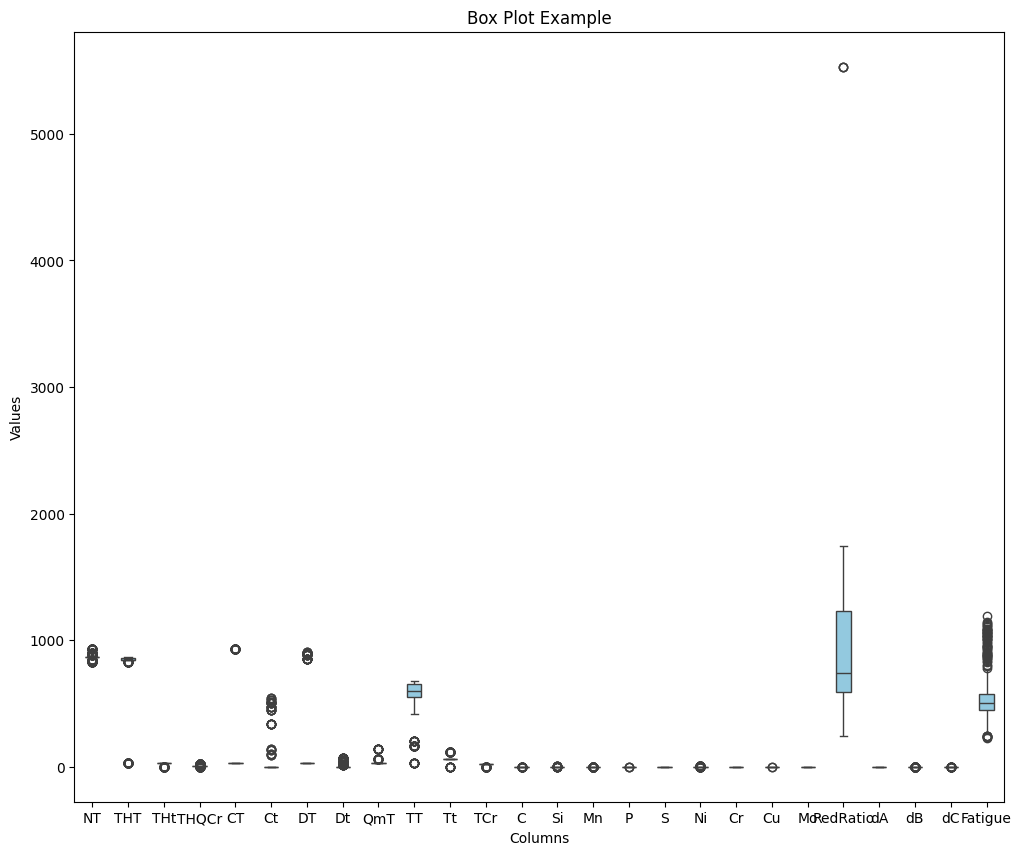

In [50]:
plt.figure(figsize=(12,10))
sns.boxplot(df_o, color='skyblue', width=0.4, orient='v')
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot Example")
plt.show()

#DBSCAN-Method

In [51]:
from sklearn.cluster import DBSCAN
def count_outliers_dbscan(data, eps=0.5, min_samples=5):

  # Check for non-numerical columns and raise an error if found
  non_numerics = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
  if non_numerics:
    raise ValueError(f"Columns '{', '.join(non_numerics)}' are not numerical. DBSCAN requires numerical data.")

  # Apply DBSCAN to each column separately
  outlier_counts = pd.Series(dtype=int)
  for col in data.columns:
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data[[col]])
    outlier_counts.loc[col] = (model.labels_ == -1).sum()  # Count points with label -1 (outliers)

  return outlier_counts

In [52]:
outlier_db=count_outliers_dbscan(df_o)

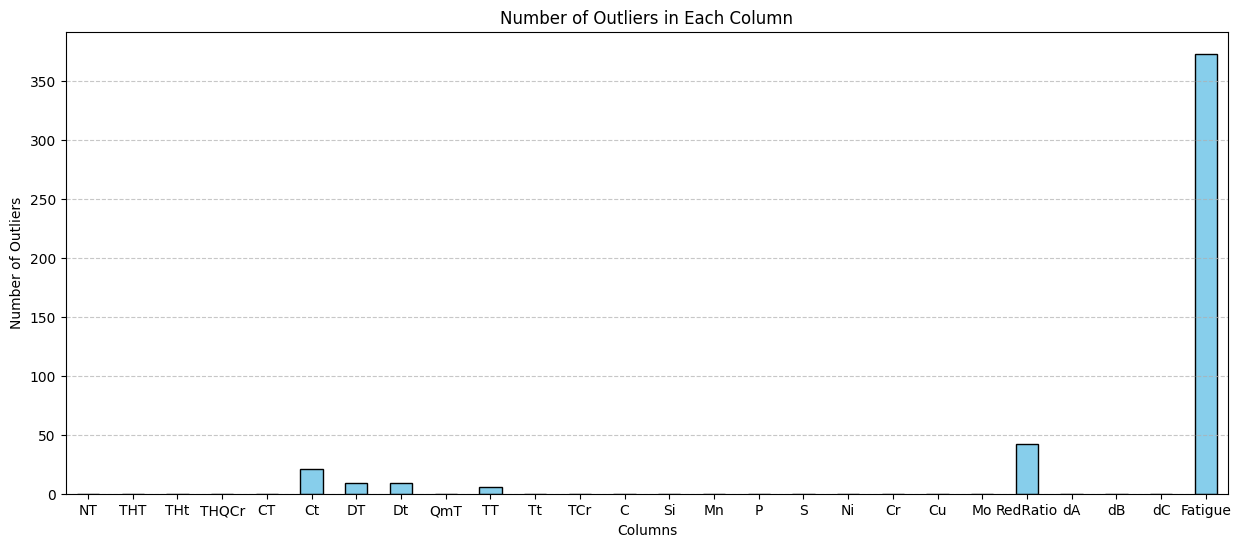

In [53]:
# Plot the results
outlier_db.plot(kind='bar', figsize=(15, 6), color='skyblue', edgecolor='black')
plt.title('Number of Outliers in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Isolation Forest Method.

In [54]:
from sklearn.ensemble import IsolationForest
import pandas as pd

def count_outliers_isolation_forest(data, contamination=0.1):
  # Check for non-numerical columns and raise an error if found
  non_numerics = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
  if non_numerics:
    raise ValueError(f"Columns '{', '.join(non_numerics)}' are not numerical. Isolation Forest requires numerical data.")

  # Apply Isolation Forest to each column separately
  outlier_counts = pd.Series(dtype=int)
  for col in data.columns:
    model = IsolationForest(contamination=contamination)
    model.fit(data[[col]])
    outlier_counts.loc[col] = (model.predict(data[[col]]) == -1).sum()  # Count points with label -1 (outliers)

  return outlier_counts

In [55]:
outlier_iso=count_outliers_isolation_forest(df_o)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

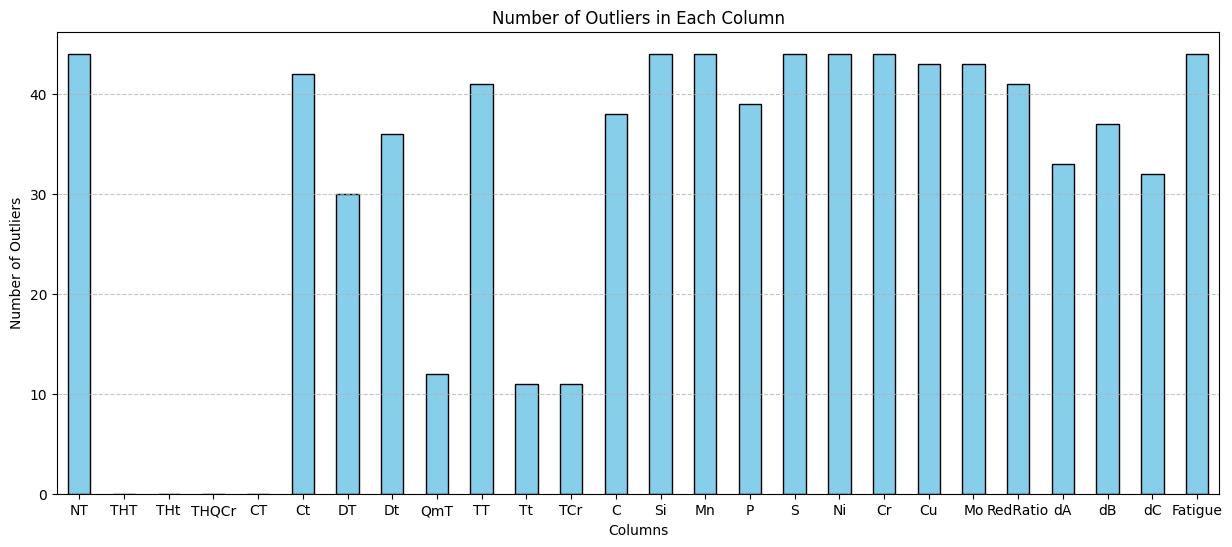

In [56]:
# Plot the results
outlier_iso.plot(kind='bar', figsize=(15, 6), color='skyblue', edgecolor='black')
plt.title('Number of Outliers in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Local Outlier Factor (LOF)

In [57]:
from sklearn.neighbors import LocalOutlierFactor

def count_outliers_lof(data, n_neighbors=20, contamination=0.1):


  # Check for non-numerical columns and raise an error if found
  non_numerics = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
  if non_numerics:
    raise ValueError(f"Columns '{', '.join(non_numerics)}' are not numerical. LOF requires numerical data.")

  # LOF considers lower scores as outliers, so a threshold is needed
  outlier_threshold = -1.0  # You can adjust this threshold based on your data and interpretation

  # Apply LOF to each column separately
  outlier_counts = pd.Series(dtype=int)
  for col in data.columns:
    model = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    model.fit_predict(data[[col]])
    outlier_counts.loc[col] = (model.negative_outlier_factor_ < outlier_threshold).sum()  # Count with LOF score < threshold

  return outlier_counts


In [58]:
outlier_lof=count_outliers_lof(df_o)

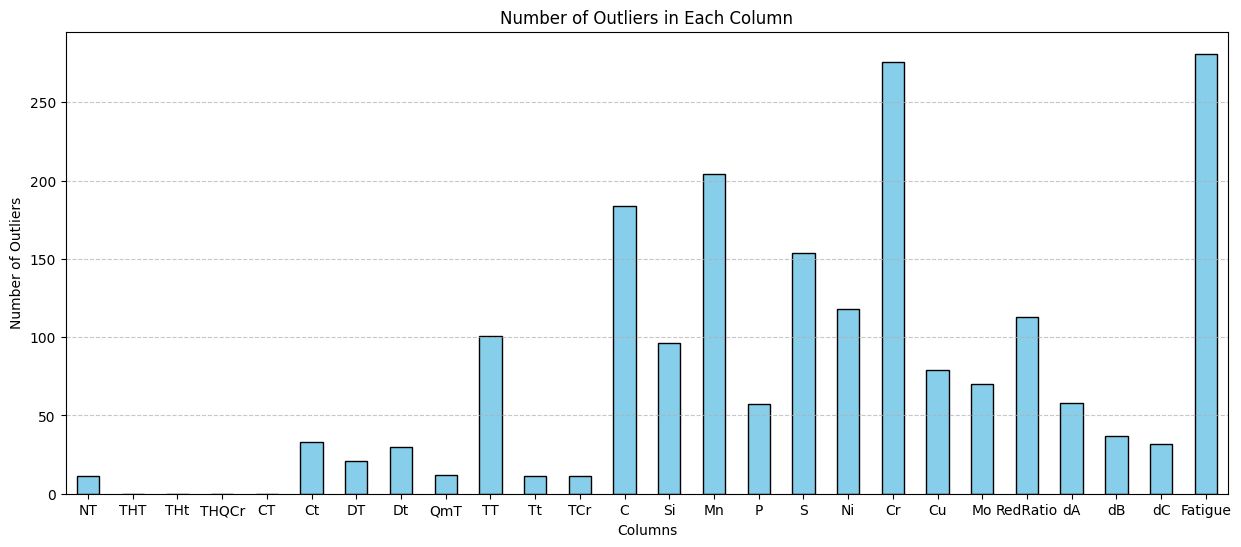

In [59]:
# Plot the results
outlier_lof.plot(kind='bar', figsize=(15, 6), color='skyblue', edgecolor='black')
plt.title('Number of Outliers in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#One class SVM

In [60]:
from sklearn.svm import OneClassSVM
def count_outliers_ocsvm(data, nu=0.1, kernel='rbf', gamma=1.0):
  # Check for non-numerical columns and raise an error if found
  non_numerics = [col for col in data.columns if not pd.api.types.is_numeric_dtype(data[col])]
  if non_numerics:
    raise ValueError(f"Columns '{', '.join(non_numerics)}' are not numerical. OCSVM requires numerical data.")

  # Apply OCSVM to each column separately
  outlier_counts = pd.Series(dtype=int)
  for col in data.columns:
    model = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
    model.fit(data[[col]])
    outlier_counts.loc[col] = ((model.decision_function(data[[col]]) < 0).sum())  # Count points with decision_function < 0 (outliers)

  return outlier_counts

In [61]:
outlier_ocs=count_outliers_ocsvm(df_o)

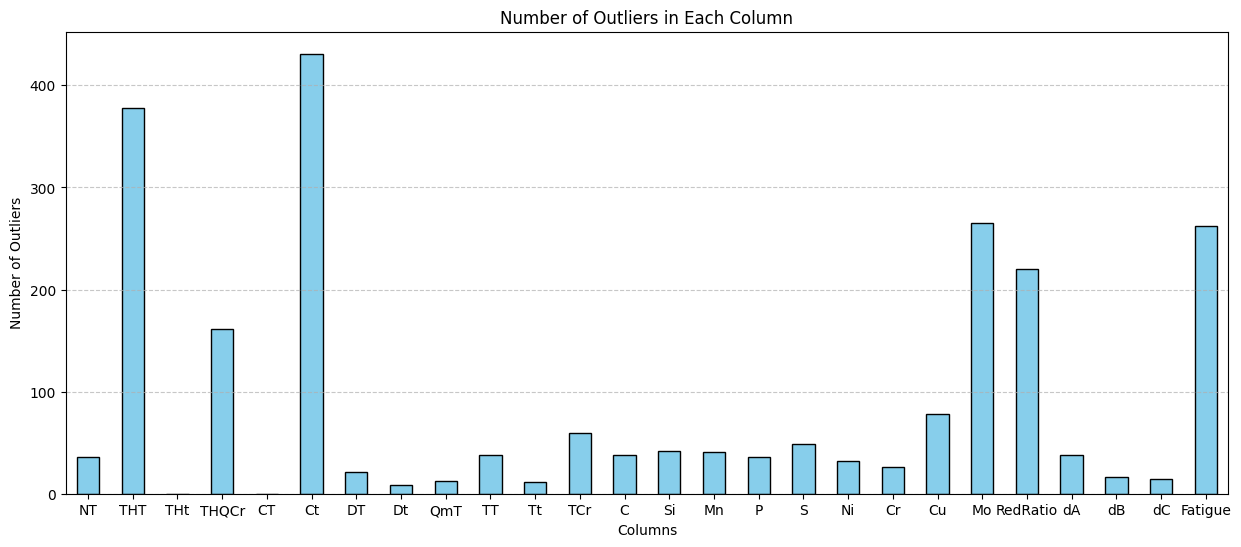

In [62]:
# Plot the results
outlier_ocs.plot(kind='bar', figsize=(15, 6), color='skyblue', edgecolor='black')
plt.title('Number of Outliers in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Feature Scaling.

#Feature Scaling is Important:

###K-Nearest Neighbors (KNN)
###Support Vector Machines (SVM) with Gaussian Radial Basis Function (RBF) kernel
###K-Means Clustering
###Principal Component Analysis (PCA)
###Gradient Descent-based algorithms (e.g., Linear Regression, Logistic Regression, Neural Networks) when using algorithms that rely on gradient descent for optimization

#Feature Scaling is Not as Important:

###Decision Trees
###Random Forests
###Gradient Boosting Machines (e.g., XGBoost, LightGBM, CatBoost)
###Naive Bayes Classifiers
###LASSO (L1 Regularization) and Ridge Regression (L2 Regularization)
###Support Vector Machines with linear kernel

#Why Feature Scaling is Important:

###Distance-Based Algorithms (e.g., K-Nearest Neighbors, K-Means Clustering): These algorithms rely on calculating distances between data points. If features have different scales, the algorithm may incorrectly emphasize features with larger scales, leading to biased results. Feature scaling ensures that all features contribute equally to the distance calculations, preserving the relative importance of each feature.
###Gradient Descent-Based Algorithms (e.g., Linear Regression, Logistic Regression, Neural Networks): Gradient descent algorithms aim to minimize a cost function by iteratively updating model parameters. When features have different scales, the cost function can have elongated or skewed contours, which can slow down the convergence of the algorithm. Feature scaling helps normalize the cost function's shape, leading to faster convergence and more stable optimization.
###SVM with Gaussian Radial Basis Function (RBF) Kernel: SVM with RBF kernel calculates the similarity between data points using a Gaussian function. Feature scaling ensures that the kernel function treats all features equally, preventing bias towards features with larger scales and improving the model's performance.

#Why Feature Scaling is Not as Important:

###Decision Trees and Random Forests: These algorithms make decisions based on feature thresholds, rather than the absolute values of features. The relative ordering of feature values is what matters, not their scale. Therefore, feature scaling doesn't affect the splitting criteria in decision trees or the construction of individual trees in random forests.

###Naive Bayes Classifiers: Naive Bayes assumes independence between features given the class label. The probability distributions of features are estimated independently, so their scales don't affect the final classification decision. Feature scaling doesn't impact the performance of Naive Bayes classifiers.
###LASSO and Ridge Regression: Regularized regression techniques like LASSO and Ridge Regression penalize large coefficients to prevent overfitting. Since feature scaling only affects the magnitude of coefficients, and not their relative importance, these algorithms are not sensitive to feature scales.

###In summary, feature scaling is important for algorithms that rely on distance calculations or gradient descent optimization, as it ensures fair comparisons between features and aids in faster convergence. However, for algorithms that make decisions based on feature thresholds or assume independence between features, feature scaling is not as critical, as their performance is unaffected by the scale of features.

In [63]:
#Normalization(min max scaler)

In [64]:
scaler_1=MinMaxScaler()


In [65]:
scaler_2=StandardScaler()


In [66]:
scaler_3=RobustScaler()

#Why Split First, Then Scale?

##Prevents Data Leakage: Imagine you're a baker competing in a pie contest. You wouldn't peek at your competitor's secret ingredient list before creating your own recipe, would you? Similarly, the test data represents unseen examples the model will encounter in the real world. If you scale using statistics (like mean and standard deviation) from the entire dataset (including the test data), the model might learn from these test values, leading to overfitting and inaccurate performance on truly new data.

##Realistic Training Scenario: In the real world, you won't have access to the test data's distribution beforehand. By splitting first and scaling on the training data only, you mimic this realistic scenario and train the model on data with a similar scale as what it will see later.

#Analogy: Training Athletes

##Imagine training athletes for a race. There are two approaches:

##Scaling Before Splitting: You measure the heights of all athletes (training and competition) and create separate short and tall groups. Then, you train each group based on their average height. This is problematic because the competition group wasn't part of the initial height measurement, making the training potentially unfair.

##Splitting Then Scaling: You split the athletes into training and competition groups first. Then, you measure the heights of only the training group and use that data to design training programs appropriate for their average height and range. This approach reflects the real situation where you wouldn't have access to the competition group's heights beforehand.

##By splitting the data first and then scaling the training data, you ensure the model trains on a more realistic representation of the data it will encounter during evaluation and deployment

#I will test the statement that first split and then scale.First i will split and then scale second first scale then split and compare both the results.

In [67]:
x

NT  THT  THt  THQCr   CT     Ct       DT    Dt  QmT   TT  ...      P  \
0    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.017   
1    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.009   
2    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.008   
3    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.018   
4    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.026   
..   ...  ...  ...    ...  ...    ...      ...   ...  ...  ...  ...    ...   
432  930   30    0      0  930  340.2  895.812  70.2  140  160  ...  0.015   
433  930   30    0      0  930  340.2  895.812  70.2  140  160  ...  0.016   
434  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.012   
435  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.015   
436  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.016   

         S    Ni    Cr    Cu    Mo  RedRatio     dA     dB     dC  
0    0.022  0.01  0.02  0.01  0.00       825  0.070  0.020  0.040  
1    0.017  0.08  0.12  0.08  0.00       610  0.110  0.000  0.040  
2    0.015  0.02  0.03  0.01  0.00      1270  0.070  0.020  0.000  
3    0.024  0.01  0.02  0.01  0.00      1740  0.060  0.000  0.000  
4    0.022  0.01  0.02  0.02  0.00       825  0.040  0.020  0.000  
..     ...   ...   ...   ...   ...       ...    ...    ...    ...  
432  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000  
433  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008  
434  0.019  0.06  1.17  0.07  0.17       690  0.080  0.000  0.000  
435  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000  
436  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008  

[437 rows x 25 columns]

In [68]:
y

0       232
1       235
2       235
3       241
4       225
       ... 
432    1030
433     957
434    1104
435    1008
436     882
Name: Fatigue, Length: 437, dtype: int64

In [69]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=42,train_size=20)

In [70]:
x_train

NT  THT  THt  THQCr   CT     Ct       DT    Dt  QmT   TT  ...      P  \
395  930   30    0      0  930  540.0  850.000  15.0  140  160  ...  0.015   
78   845  845   30     24   30    0.0   30.000   0.0   30  650  ...  0.011   
278  870  845   30      8   30    0.0   30.000   0.0   30  650  ...  0.014   
305  900  845   30      8   30    0.0   30.000   0.0   30  650  ...  0.016   
325  870  845   30      8   30    0.0   30.000   0.0   30  630  ...  0.010   
..   ...  ...  ...    ...  ...    ...      ...   ...  ...  ...  ...    ...   
385  845  845   30      8   30    0.0   30.000   0.0   30  430  ...  0.013   
293  900  845   30      8   30    0.0   30.000   0.0   30  600  ...  0.018   
413  930   30    0      0  930  100.2  895.517  34.8   60  160  ...  0.021   
343  870  845   30      8   30    0.0   30.000   0.0   30  680  ...  0.016   
257  870  845   30      8   30    0.0   30.000   0.0   30  600  ...  0.010   

         S    Ni    Cr    Cu    Mo  RedRatio     dA   dB     dC  
395  0.016  1.62  0.59  0.07  0.21       440  0.008  0.0  0.000  
78   0.025  0.12  0.04  0.15  0.00       610  0.090  0.0  0.040  
278  0.008  0.10  0.26  0.10  0.00      1100  0.030  0.0  0.000  
305  0.016  2.63  0.71  0.10  0.00       700  0.010  0.0  0.010  
325  0.012  1.67  0.72  0.07  0.18       640  0.010  0.0  0.000  
..     ...   ...   ...   ...   ...       ...    ...  ...    ...  
385  0.011  0.13  0.68  0.26  0.05       622  0.050  0.0  0.058  
293  0.004  2.64  0.75  0.05  0.00       420  0.000  0.0  0.020  
413  0.006  0.08  1.09  0.14  0.03       460  0.025  0.0  0.004  
343  0.017  1.80  0.75  0.04  0.23      5530  0.080  0.0  0.010  
257  0.009  0.04  0.15  0.05  0.00       820  0.030  0.0  0.000  

[417 rows x 25 columns]

In [71]:
x_test

NT  THT  THt  THQCr   CT     Ct       DT    Dt  QmT   TT  ...      P  \
308  900  845   30      8   30    0.0   30.000   0.0   30  650  ...  0.010   
149  870  855   30      8   30    0.0   30.000   0.0   30  550  ...  0.015   
130  870  855   30      8   30    0.0   30.000   0.0   30  650  ...  0.010   
151  870  855   30      8   30    0.0   30.000   0.0   30  600  ...  0.017   
359  870  845   30      8   30    0.0   30.000   0.0   30  630  ...  0.011   
99   825  825   30     24   30    0.0   30.000   0.0   30  600  ...  0.009   
372  845  845   30      8   30    0.0   30.000   0.0   30  430  ...  0.027   
87   825  825   30     24   30    0.0   30.000   0.0   30  550  ...  0.024   
330  870  845   30      8   30    0.0   30.000   0.0   30  630  ...  0.011   
214  870  855   30      8   30    0.0   30.000   0.0   30  650  ...  0.013   
121  870  855   30      8   30    0.0   30.000   0.0   30  600  ...  0.022   
436  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.016   
20   865  865   30     24   30    0.0   30.000   0.0   30  550  ...  0.016   
188  870  855   30      8   30    0.0   30.000   0.0   30  550  ...  0.015   
71   845  845   30     24   30    0.0   30.000   0.0   30  650  ...  0.010   
106  825  825   30     24   30    0.0   30.000   0.0   30  650  ...  0.013   
270  870  845   30      8   30    0.0   30.000   0.0   30  650  ...  0.017   
348  870  845   30      8   30    0.0   30.000   0.0   30  680  ...  0.015   
435  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.015   
102  825  825   30     24   30    0.0   30.000   0.0   30  650  ...  0.018   

         S    Ni    Cr    Cu    Mo  RedRatio     dA     dB     dC  
308  0.009  2.63  0.84  0.05  0.00       700  0.010  0.000  0.010  
149  0.012  0.07  1.07  0.12  0.16      1120  0.030  0.000  0.020  
130  0.008  0.02  0.96  0.04  0.00       820  0.010  0.000  0.010  
151  0.016  0.05  1.01  0.19  0.16       820  0.080  0.000  0.010  
359  0.007  1.76  0.79  0.06  0.00       740  0.030  0.000  0.010  
99   0.023  0.03  0.10  0.03  0.00       610  0.060  0.000  0.040  
372  0.010  0.01  0.15  0.01  0.00      1228  0.040  0.000  0.000  
87   0.022  0.02  0.10  0.01  0.00      1270  0.100  0.010  0.000  
330  0.012  1.71  0.74  0.08  0.20      1290  0.060  0.000  0.000  
214  0.019  0.05  0.99  0.08  0.16       700  0.030  0.000  0.000  
121  0.013  0.03  1.12  0.02  0.00      1740  0.030  0.000  0.000  
436  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008  
20   0.023  0.03  0.01  0.01  0.00       825  0.070  0.040  0.000  
188  0.008  0.07  1.04  0.12  0.17       820  0.040  0.000  0.010  
71   0.009  0.12  0.06  0.13  0.00       610  0.060  0.000  0.010  
106  0.019  0.01  0.01  0.01  0.00       825  0.100  0.000  0.000  
270  0.010  0.08  0.26  0.10  0.00      1100  0.030  0.000  0.000  
348  0.013  1.76  0.82  0.09  0.23       640  0.030  0.000  0.000  
435  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000  
102  0.012  0.01  0.09  0.01  0.00      1740  0.070  0.000  0.000  

[20 rows x 25 columns]

In [72]:
x_train_scaled_1=scaler_1.fit_transform(x_train)

In [73]:
x_train_scaled_1 = pd.DataFrame(x_train_scaled_1, columns=x_train.columns)

In [74]:
x_train_scaled_1

NT       THT  THt     THQCr   CT        Ct        DT        Dt  \
0    1.000000  0.000000  0.0  0.000000  1.0  1.000000  0.938932  0.213675   
1    0.190476  0.976048  1.0  1.000000  0.0  0.000000  0.000000  0.000000   
2    0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
3    0.714286  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
4    0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
..        ...       ...  ...       ...  ...       ...       ...       ...   
412  0.190476  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
413  0.714286  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
414  1.000000  0.000000  0.0  0.000000  1.0  0.185556  0.991050  0.495726   
415  0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
416  0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   

          QmT        TT  ...         P         S        Ni        Cr    Cu  \
0    1.000000  0.200000  ...  0.448276  0.481481  0.581227  0.500000  0.24   
1    0.000000  0.953846  ...  0.310345  0.814815  0.039711  0.025862  0.56   
2    0.000000  0.953846  ...  0.413793  0.185185  0.032491  0.215517  0.36   
3    0.000000  0.953846  ...  0.482759  0.481481  0.945848  0.603448  0.36   
4    0.000000  0.923077  ...  0.275862  0.333333  0.599278  0.612069  0.24   
..        ...       ...  ...       ...       ...       ...       ...   ...   
412  0.000000  0.615385  ...  0.379310  0.296296  0.043321  0.577586  1.00   
413  0.000000  0.876923  ...  0.551724  0.037037  0.949458  0.637931  0.16   
414  0.272727  0.200000  ...  0.655172  0.111111  0.025271  0.931034  0.52   
415  0.000000  1.000000  ...  0.482759  0.518519  0.646209  0.637931  0.12   
416  0.000000  0.876923  ...  0.275862  0.222222  0.010830  0.120690  0.16   

           Mo  RedRatio        dA   dB        dC  
0    0.875000  0.037807  0.061538  0.0  0.000000  
1    0.000000  0.069943  0.692308  0.0  0.689655  
2    0.000000  0.162571  0.230769  0.0  0.000000  
3    0.000000  0.086957  0.076923  0.0  0.172414  
4    0.750000  0.075614  0.076923  0.0  0.000000  
..        ...       ...       ...  ...       ...  
412  0.208333  0.072212  0.384615  0.0  1.000000  
413  0.000000  0.034026  0.000000  0.0  0.344828  
414  0.125000  0.041588  0.192308  0.0  0.068966  
415  0.958333  1.000000  0.615385  0.0  0.172414  
416  0.000000  0.109641  0.230769  0.0  0.000000  

[417 rows x 25 columns]

In [75]:
y_train

395    1054
78      398
278     460
305     471
325     551
       ... 
385     700
293     517
413     854
343     483
257     449
Name: Fatigue, Length: 417, dtype: int64

In [76]:
x_train_scaled_2=scaler_2.fit_transform(x_train)

In [77]:
x_train_scaled_2 = pd.DataFrame(x_train_scaled_2, columns=x_train.columns)

In [78]:
x_train_scaled_3=scaler_3.fit_transform(x_train)

In [79]:
x_train_scaled_3 = pd.DataFrame(x_train_scaled_3, columns=x_train.columns)

#First i will fit all the scaled data with different scalers with linear regression-Here i am testing the approach first split then scale.

In [80]:
model_min_max=LinearRegression()

In [81]:
model_norm=LinearRegression()

In [82]:
model_robus=LinearRegression()

In [83]:
model_min_max.fit(x_train_scaled_1,y_train)

LinearRegression()

In [84]:
model_norm.fit(x_train_scaled_2,y_train)

LinearRegression()

In [85]:
model_robus.fit(x_train_scaled_3,y_train)

LinearRegression()

In [86]:
y_pred_model_min_max=model_min_max.predict(x_train_scaled_1)

In [87]:
y_pred_model_norm=model_norm.predict(x_train_scaled_2)

In [88]:
y_pred_model_robus=model_robus.predict(x_train_scaled_3)

#Checking the accuracy on all the 3 scalers.

In [89]:
from sklearn.metrics import r2_score

In [90]:
min_max_scaler_1_accuracy_train=r2_score(y_train,y_pred_model_min_max)

In [91]:
min_max_scaler_1_accuracy_train

0.9727680161814434

In [92]:
std_scaler_2_accuracy_train=r2_score(y_train,y_pred_model_norm)

In [93]:
std_scaler_2_accuracy_train

0.9728227237470093

In [94]:
robus_scaler_3_accuracy_train=r2_score(y_train,y_pred_model_robus)

In [95]:
robus_scaler_3_accuracy_train

0.9728524368519713

#Now Here i am testing the approach first scale than split.

In [96]:
x_2=df.drop('Fatigue',axis=1)
y_2=df['Fatigue']

In [97]:
x_2_scaled_1=scaler_1.fit_transform(x_2)

In [98]:
x_2_scaled_1 = pd.DataFrame(x_2_scaled_1, columns=x_2.columns)

In [99]:
x_2_scaled_1

NT  THT  THt  THQCr   CT    Ct        DT   Dt       QmT        TT  \
0    0.571429  0.0  0.0    0.0  0.0  0.00  0.000000  0.0  0.000000  0.000000   
1    0.571429  0.0  0.0    0.0  0.0  0.00  0.000000  0.0  0.000000  0.000000   
2    0.571429  0.0  0.0    0.0  0.0  0.00  0.000000  0.0  0.000000  0.000000   
3    0.571429  0.0  0.0    0.0  0.0  0.00  0.000000  0.0  0.000000  0.000000   
4    0.571429  0.0  0.0    0.0  0.0  0.00  0.000000  0.0  0.000000  0.000000   
..        ...  ...  ...    ...  ...   ...       ...  ...       ...       ...   
432  1.000000  0.0  0.0    0.0  1.0  0.63  0.991388  1.0  1.000000  0.200000   
433  1.000000  0.0  0.0    0.0  1.0  0.63  0.991388  1.0  1.000000  0.200000   
434  1.000000  0.0  0.0    0.0  1.0  0.63  0.991388  1.0  0.272727  0.261538   
435  1.000000  0.0  0.0    0.0  1.0  0.63  0.991388  1.0  0.272727  0.261538   
436  1.000000  0.0  0.0    0.0  1.0  0.63  0.991388  1.0  0.272727  0.261538   

     ...         P         S        Ni        Cr    Cu        Mo  RedRatio  \
0    ...  0.517241  0.703704  0.000000  0.008621  0.00  0.000000  0.110586   
1    ...  0.241379  0.518519  0.025271  0.094828  0.28  0.000000  0.069943   
2    ...  0.206897  0.444444  0.003610  0.017241  0.00  0.000000  0.194707   
3    ...  0.551724  0.777778  0.000000  0.008621  0.00  0.000000  0.283554   
4    ...  0.827586  0.703704  0.000000  0.008621  0.04  0.000000  0.110586   
..   ...       ...       ...       ...       ...   ...       ...       ...   
432  ...  0.448276  0.777778  0.003610  0.775862  0.00  0.625000  0.000000   
433  ...  0.482759  0.444444  0.021661  0.922414  0.28  0.625000  0.054820   
434  ...  0.344828  0.592593  0.018051  1.000000  0.24  0.708333  0.085066   
435  ...  0.448276  0.777778  0.003610  0.775862  0.00  0.625000  0.000000   
436  ...  0.482759  0.444444  0.021661  0.922414  0.28  0.625000  0.054820   

           dA    dB        dC  
0    0.538462  0.40  0.689655  
1    0.846154  0.00  0.689655  
2    0.538462  0.40  0.000000  
3    0.461538  0.00  0.000000  
4    0.307692  0.40  0.000000  
..        ...   ...       ...  
432  0.384615  0.20  0.000000  
433  0.130769  0.08  0.137931  
434  0.615385  0.00  0.000000  
435  0.384615  0.20  0.000000  
436  0.130769  0.08  0.137931  

[437 rows x 25 columns]

In [100]:
x_2_scaled_2=scaler_2.fit_transform(x_2)

In [101]:
x_2_scaled_2 = pd.DataFrame(x_2_scaled_2, columns=x_2.columns)

In [102]:
x_2_scaled_3=scaler_3.fit_transform(x_2)

In [103]:
x_2_scaled_3 = pd.DataFrame(x_2_scaled_3, columns=x_2.columns)

In [104]:
x_2_scaled_1_test,x_2_scaled_1_train,y_2_test,y_2_train=train_test_split(x_2_scaled_1,y_2,random_state=42,train_size=20)

In [105]:
y_2_train.shape


(417,)

In [106]:
x_2_scaled_1_train.shape

(417, 25)

In [107]:
x_2_scaled_2_test,x_2_scaled_2_train,y_2_test,y_2_train=train_test_split(x_2_scaled_2,y_2,random_state=42,train_size=20)

In [108]:
x_2_scaled_3_test,x_2_scaled_3_train,y_2_test,y_2_train=train_test_split(x_2_scaled_3,y_2,random_state=42,train_size=20)

#Fitting the model on all 3 scaled datasets.

In [109]:
model_1_x2_scale_1_train=LinearRegression()

In [110]:
model_1_x2_scale_1_train.fit(x_2_scaled_1_train,y_2_train)

LinearRegression()

In [111]:
model_1_x2_scale_1_test=LinearRegression()

In [112]:
model_1_x2_scale_1_test.fit(x_2_scaled_1_test,y_2_test)

LinearRegression()

In [113]:
model_1_x2_scale_1_train_y_pred=model_1_x2_scale_1_train.predict(x_2_scaled_1_train)

In [114]:
train_acc_scale_1=r2_score(y_2_train,model_1_x2_scale_1_train_y_pred)

In [115]:
train_acc_scale_1

0.9727680161814434

In [116]:
model_1_x2_scale_1_test_y_pred=model_1_x2_scale_1_test.predict(x_2_scaled_1_test)

In [117]:
test_acc_scale_1=r2_score(y_2_test,model_1_x2_scale_1_test_y_pred)

In [118]:
test_acc_scale_1

0.9998842012969467

In [119]:
model_2_x2_scale_2_train=LinearRegression()

In [120]:
model_2_x2_scale_2_train.fit(x_2_scaled_2_train,y_2_train)

LinearRegression()

In [121]:
model_2_x2_scale_2_test=LinearRegression()

In [122]:
model_2_x2_scale_2_test.fit(x_2_scaled_2_test,y_2_test)

LinearRegression()

In [123]:
model_2_x2_scale_2_train_y_pred=model_2_x2_scale_2_train.predict(x_2_scaled_2_train)

In [124]:
train_acc_scale_2=r2_score(y_2_train,model_2_x2_scale_2_train_y_pred)

In [125]:
train_acc_scale_2

0.9727608282358395

In [126]:
model_2_x2_scale_2_test_y_pred=model_2_x2_scale_2_test.predict(x_2_scaled_2_test)

In [127]:
test_acc_scale_2=r2_score(y_2_test,model_2_x2_scale_2_test_y_pred)

In [128]:
test_acc_scale_2

0.9998842012969467

In [129]:
model_3_x2_scale_3_train=LinearRegression()

In [130]:
model_3_x2_scale_3_train.fit(x_2_scaled_3_train,y_2_train)

LinearRegression()

In [131]:
model_3_x2_scale_3_test=LinearRegression()

In [132]:
model_3_x2_scale_3_test.fit(x_2_scaled_3_test,y_2_test)

LinearRegression()

In [133]:
model_3_x2_scale_3_train_y_pred=model_3_x2_scale_3_train.predict(x_2_scaled_3_train)

In [134]:
train_acc_scale_3=r2_score(y_2_train,model_3_x2_scale_3_train_y_pred)

In [135]:
train_acc_scale_3

0.9728524368519713

In [136]:
model_3_x2_scale_3_test_y_pred=model_3_x2_scale_3_test.predict(x_2_scaled_3_test)

In [137]:
test_acc_scale_3=r2_score(y_2_test,model_3_x2_scale_3_test_y_pred)

In [138]:
test_acc_scale_3

0.9998842012969467

#Dimensionality Reduction.

##Let's consider an example dataset involving customer purchase behavior for an online retail platform. This dataset contains various features related to customer demographics, purchase history, and browsing behavior. We'll explore how the decision to use dimensionality reduction techniques is influenced by different factors:

##Specific characteristics of the dataset:

##Number of features: The dataset contains hundreds of features, including age, gender, location, product categories browsed, purchase frequency, and total purchase amount.

##Number of samples: There are thousands of customers in the dataset, each represented by a row.

##Goals of the analysis:

##Customer segmentation: One of the main goals is to segment customers based on their purchasing behavior to tailor marketing strategies and recommendations.
##Predictive modeling: Another goal is to build predictive models to forecast customer lifetime value or predict future purchases.

#Computational constraints:

##Computational resources: While you have access to reasonably powerful computing resources, processing high-dimensional data can still be resource-intensive.
##Time constraints: There's a need to perform analyses efficiently and derive insights in a timely manner.
##Given these factors, let's analyze whether dimensionality reduction techniques should be employed:

##Specific characteristics of the dataset:

##The dataset contains a large number of features relative to the number of samples, indicating high dimensionality. This suggests that dimensionality reduction techniques could be beneficial to simplify the dataset and mitigate issues such as overfitting.

##Goals of the analysis:

##For customer segmentation, dimensionality reduction can help identify the most significant patterns in the data and reduce the complexity of clustering algorithms, making it easier to interpret the resulting customer segments.

##For predictive modeling, dimensionality reduction can improve model generalization and computational efficiency by focusing on the most informative features.

##Computational constraints:

##Dimensionality reduction can improve computational efficiency by reducing the dimensionality of the dataset, making subsequent analyses faster and more scalable.

##Based on these considerations, it's evident that employing dimensionality reduction techniques such as Principal Component Analysis (PCA) or feature selection methods would likely be beneficial for this dataset. By reducing the dimensionality, you can simplify the dataset, improve computational efficiency, and enhance the interpretability of the results, ultimately helping you achieve your analysis goals effectively and efficiently.

##There are several dimensionality reduction techniques available in the field of machine learning and data analysis. These techniques can be broadly categorized into two main types: linear and nonlinear dimensionality reduction methods. Here's an overview of some commonly used techniques:

#Linear Dimensionality Reduction:

##Principal Component Analysis (PCA): PCA is one of the most widely used techniques for dimensionality reduction. It identifies the principal components that capture the maximum variance in the data and projects the data onto these components.

##Linear Discriminant Analysis (LDA): LDA is a supervised dimensionality reduction technique that aims to find the linear combinations of features that best separate different classes in the data.

##Factor Analysis: Factor analysis is a statistical method that explores the underlying structure of the observed variables and reduces the dimensionality by identifying common factors.

##Independent Component Analysis (ICA): ICA separates a multivariate signal into additive, independent components by maximizing the statistical independence of the estimated components.

#Nonlinear Dimensionality Reduction:

##t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a technique commonly used for visualizing high-dimensional data in two or three dimensions. It preserves local structure in the data by modeling similarities between data points in the high-dimensional space.

##Isomap: Isomap is a nonlinear dimensionality reduction technique that aims to preserve the geodesic distances between data points in a lower-dimensional space. It constructs a low-dimensional embedding of the data based on the intrinsic geometry of the data manifold.

##Locally Linear Embedding (LLE): LLE seeks to preserve the local relationships between data points in the high-dimensional space by modeling each data point as a linear combination of its neighbors. It then finds a low-dimensional representation that best reconstructs the original data from these local relationships.

##Autoencoders: Autoencoders are neural network architectures used for unsupervised learning of efficient data codings. They consist of an encoder network that maps the input data to a lower-dimensional latent space and a decoder network that reconstructs the input data from the latent space representation.

###These are just a few examples of dimensionality reduction techniques, and there are many variations and extensions of these methods. The choice of technique depends on various factors such as the nature of the data, the desired properties of the reduced-dimensional representation, and the specific goals of the analysis.

#Lets first try Linear technique of feature extraction

In [139]:
from sklearn.decomposition import PCA,FactorAnalysis,FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [140]:
x

NT  THT  THt  THQCr   CT     Ct       DT    Dt  QmT   TT  ...      P  \
0    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.017   
1    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.009   
2    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.008   
3    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.018   
4    885   30    0      0   30    0.0   30.000   0.0   30   30  ...  0.026   
..   ...  ...  ...    ...  ...    ...      ...   ...  ...  ...  ...    ...   
432  930   30    0      0  930  340.2  895.812  70.2  140  160  ...  0.015   
433  930   30    0      0  930  340.2  895.812  70.2  140  160  ...  0.016   
434  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.012   
435  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.015   
436  930   30    0      0  930  340.2  895.812  70.2   60  200  ...  0.016   

         S    Ni    Cr    Cu    Mo  RedRatio     dA     dB     dC  
0    0.022  0.01  0.02  0.01  0.00       825  0.070  0.020  0.040  
1    0.017  0.08  0.12  0.08  0.00       610  0.110  0.000  0.040  
2    0.015  0.02  0.03  0.01  0.00      1270  0.070  0.020  0.000  
3    0.024  0.01  0.02  0.01  0.00      1740  0.060  0.000  0.000  
4    0.022  0.01  0.02  0.02  0.00       825  0.040  0.020  0.000  
..     ...   ...   ...   ...   ...       ...    ...    ...    ...  
432  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000  
433  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008  
434  0.019  0.06  1.17  0.07  0.17       690  0.080  0.000  0.000  
435  0.024  0.02  0.91  0.01  0.15       240  0.050  0.010  0.000  
436  0.015  0.07  1.08  0.08  0.15       530  0.017  0.004  0.008  

[437 rows x 25 columns]

In [141]:
x_train_scaled_pca=scaler_1.fit_transform(x_train)

In [144]:
x_train_scaled_pca = pd.DataFrame(x_train_scaled_pca, columns=x_train.columns)

In [143]:
x_test_scaled_pca=scaler_1.fit_transform(x_test)

In [145]:
x_test_scaled_pca = pd.DataFrame(x_test_scaled_pca, columns=x_test.columns)

In [146]:
x_test_scaled_pca

NT       THT  THt     THQCr   CT   Ct   DT   Dt  QmT        TT  ...  \
0   0.714286  0.976048  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.937500  ...   
1   0.428571  0.988024  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.729167  ...   
2   0.428571  0.988024  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.937500  ...   
3   0.428571  0.988024  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.833333  ...   
4   0.428571  0.976048  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.895833  ...   
5   0.000000  0.952096  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.833333  ...   
6   0.190476  0.976048  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.479167  ...   
7   0.000000  0.952096  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.729167  ...   
8   0.428571  0.976048  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.895833  ...   
9   0.428571  0.988024  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.937500  ...   
10  0.428571  0.988024  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.833333  ...   
11  1.000000  0.000000  0.0  0.000000  1.0  1.0  1.0  1.0  1.0  0.000000  ...   
12  0.380952  1.000000  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.729167  ...   
13  0.428571  0.988024  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.729167  ...   
14  0.190476  0.976048  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.937500  ...   
15  0.000000  0.952096  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.937500  ...   
16  0.428571  0.976048  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.937500  ...   
17  0.428571  0.976048  1.0  0.333333  0.0  0.0  0.0  0.0  0.0  1.000000  ...   
18  1.000000  0.000000  0.0  0.000000  1.0  1.0  1.0  1.0  1.0  0.000000  ...   
19  0.000000  0.952096  1.0  1.000000  0.0  0.0  0.0  0.0  0.0  0.937500  ...   

           P         S        Ni        Cr        Cu        Mo  RedRatio  \
0   0.055556  0.117647  1.000000  0.747748  0.222222  0.000000  0.306667   
1   0.333333  0.294118  0.022901  0.954955  0.611111  0.695652  0.586667   
2   0.055556  0.058824  0.003817  0.855856  0.166667  0.000000  0.386667   
3   0.444444  0.529412  0.015267  0.900901  1.000000  0.695652  0.386667   
4   0.111111  0.000000  0.667939  0.702703  0.277778  0.000000  0.333333   
5   0.000000  0.941176  0.007634  0.081081  0.111111  0.000000  0.246667   
6   1.000000  0.176471  0.000000  0.126126  0.000000  0.000000  0.658667   
7   0.833333  0.882353  0.003817  0.081081  0.000000  0.000000  0.686667   
8   0.111111  0.294118  0.648855  0.657658  0.388889  0.869565  0.700000   
9   0.222222  0.705882  0.015267  0.882883  0.388889  0.695652  0.306667   
10  0.722222  0.352941  0.007634  1.000000  0.055556  0.000000  1.000000   
11  0.388889  0.470588  0.022901  0.963964  0.388889  0.652174  0.193333   
12  0.388889  0.941176  0.007634  0.000000  0.000000  0.000000  0.390000   
13  0.333333  0.058824  0.022901  0.927928  0.611111  0.739130  0.386667   
14  0.055556  0.117647  0.041985  0.045045  0.666667  0.000000  0.246667   
15  0.222222  0.705882  0.000000  0.000000  0.000000  0.000000  0.390000   
16  0.444444  0.176471  0.026718  0.225225  0.500000  0.000000  0.573333   
17  0.333333  0.352941  0.667939  0.729730  0.444444  1.000000  0.266667   
18  0.333333  1.000000  0.003817  0.810811  0.000000  0.652174  0.000000   
19  0.500000  0.294118  0.000000  0.072072  0.000000  0.000000  1.000000   

          dA    dB    dC  
0   0.000000  0.00  0.25  
1   0.222222  0.00  0.50  
2   0.000000  0.00  0.25  
3   0.777778  0.00  0.25  
4   0.222222  0.00  0.25  
5   0.555556  0.00  1.00  
6   0.333333  0.00  0.00  
7   1.000000  0.25  0.00  
8   0.555556  0.00  0.00  
9   0.222222  0.00  0.00  
10  0.222222  0.00  0.00  
11  0.077778  0.10  0.20  
12  0.666667  1.00  0.00  
13  0.333333  0.00  0.25  
14  0.555556  0.00  0.25  
15  1.000000  0.00  0.00  
16  0.222222  0.00  0.00  
17  0.222222  0.00  0.00  
18  0.444444  0.25  0.00  
19  0.666667  0.00  0.00  

[20 rows x 25 columns]

In [147]:
x_train_scaled_pca

NT       THT  THt     THQCr   CT        Ct        DT        Dt  \
0    1.000000  0.000000  0.0  0.000000  1.0  1.000000  0.938932  0.213675   
1    0.190476  0.976048  1.0  1.000000  0.0  0.000000  0.000000  0.000000   
2    0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
3    0.714286  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
4    0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
..        ...       ...  ...       ...  ...       ...       ...       ...   
412  0.190476  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
413  0.714286  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
414  1.000000  0.000000  0.0  0.000000  1.0  0.185556  0.991050  0.495726   
415  0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   
416  0.428571  0.976048  1.0  0.333333  0.0  0.000000  0.000000  0.000000   

          QmT        TT  ...         P         S        Ni        Cr    Cu  \
0    1.000000  0.200000  ...  0.448276  0.481481  0.581227  0.500000  0.24   
1    0.000000  0.953846  ...  0.310345  0.814815  0.039711  0.025862  0.56   
2    0.000000  0.953846  ...  0.413793  0.185185  0.032491  0.215517  0.36   
3    0.000000  0.953846  ...  0.482759  0.481481  0.945848  0.603448  0.36   
4    0.000000  0.923077  ...  0.275862  0.333333  0.599278  0.612069  0.24   
..        ...       ...  ...       ...       ...       ...       ...   ...   
412  0.000000  0.615385  ...  0.379310  0.296296  0.043321  0.577586  1.00   
413  0.000000  0.876923  ...  0.551724  0.037037  0.949458  0.637931  0.16   
414  0.272727  0.200000  ...  0.655172  0.111111  0.025271  0.931034  0.52   
415  0.000000  1.000000  ...  0.482759  0.518519  0.646209  0.637931  0.12   
416  0.000000  0.876923  ...  0.275862  0.222222  0.010830  0.120690  0.16   

           Mo  RedRatio        dA   dB        dC  
0    0.875000  0.037807  0.061538  0.0  0.000000  
1    0.000000  0.069943  0.692308  0.0  0.689655  
2    0.000000  0.162571  0.230769  0.0  0.000000  
3    0.000000  0.086957  0.076923  0.0  0.172414  
4    0.750000  0.075614  0.076923  0.0  0.000000  
..        ...       ...       ...  ...       ...  
412  0.208333  0.072212  0.384615  0.0  1.000000  
413  0.000000  0.034026  0.000000  0.0  0.344828  
414  0.125000  0.041588  0.192308  0.0  0.068966  
415  0.958333  1.000000  0.615385  0.0  0.172414  
416  0.000000  0.109641  0.230769  0.0  0.000000  

[417 rows x 25 columns]

In [173]:
pca=PCA(n_components=4)

In [174]:
df_pca_train=pca.fit_transform(x_train_scaled_pca)

In [176]:
df_pca_train = pd.DataFrame(df_pca_train, columns=['pca_1', 'pca_2','pca_3', 'pca_4'])

In [177]:
df_pca_train

pca_1     pca_2     pca_3     pca_4
0    2.520344 -0.005703  0.032063  0.266278
1   -0.626583  0.625108 -0.135785  0.160492
2   -0.404049  0.120942  0.398252 -0.522144
3   -0.158872 -0.453698  0.598104  0.526159
4   -0.157393 -0.660560  0.029742  0.185987
..        ...       ...       ...       ...
412 -0.295440 -0.206522  0.077121 -0.239998
413 -0.153754 -0.566529  0.777373  0.485973
414  2.213426  0.135998  0.256816 -0.271942
415 -0.203329 -0.572988 -0.423287  0.403962
416 -0.385851  0.209300  0.436679 -0.492312

[417 rows x 4 columns]

In [178]:
pca.explained_variance_

array([0.80440079, 0.27346417, 0.12402327, 0.09261741])

In [179]:
df_pca_test=pca.fit_transform(x_test_scaled_pca)

In [180]:
df_pca_test = pd.DataFrame(df_pca_test, columns=['pca_1', 'pca_2','pca_3', 'pca_4'])

In [181]:
df_pca_test

pca_1     pca_2     pca_3     pca_4
0  -0.138231 -0.755666 -0.026411  0.846643
1  -0.054579 -0.664848 -0.090453 -0.324166
2  -0.222608 -0.475657  0.159280  0.450854
3  -0.076414 -0.499812 -0.373005 -0.697705
4  -0.294213 -0.525396  0.074596  0.612281
5  -0.612495  0.706806 -0.708196  0.380919
6  -0.466676  0.414192  1.153254 -0.138963
7  -0.678366  1.087078  0.068228 -0.367391
8  -0.170623 -0.597700 -0.198843 -0.229766
9  -0.054148 -0.453994 -0.248526 -0.350961
10 -0.249925 -0.211601  0.622582 -0.129541
11  3.025357  0.129492  0.163589  0.114766
12 -0.419991  0.959501 -0.301119 -0.020078
13 -0.068679 -0.695856 -0.054000 -0.327738
14 -0.601982  0.231438 -0.344215  0.324698
15 -0.702092  0.888572 -0.305328  0.018616
16 -0.398769 -0.063399  0.543203  0.062938
17 -0.068534 -0.776660 -0.275081 -0.217660
18  3.027520  0.631902 -0.121220 -0.002697
19 -0.774551  0.671609  0.261665 -0.005048

In [182]:
pca.explained_variance_

array([1.12791545, 0.41834115, 0.17315844, 0.13984742])

In [183]:
model=LinearRegression()

In [184]:
model.fit(df_pca_train,y_train)

LinearRegression()

In [185]:
y_pred_train=model.predict(df_pca_train)

In [186]:
accuracy_train=r2_score(y_train,y_pred_train)

In [187]:
accuracy_train

0.6796883779421197

In [188]:
model.fit(df_pca_test,y_test)

LinearRegression()

In [189]:
y_pred_test=model.predict(df_pca_test)

In [190]:
accuracy_test=r2_score(y_test,y_pred_test)

In [191]:
accuracy_test

0.855036688836583